In [150]:
# Data Preprocessing Libraries
import pandas as pd
from pandas_gbq import read_gbq
import numpy as np
import dotenv
import ast
from collections import defaultdict
import platform

# Data Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Regression Analytics
import statsmodels.api as sm

# Ignore warnings
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="n_jobs value")

# 시스템에 따라 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux (Colab 포함)
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# BigQuery에 업로드된 데이터 불러오기 (pandas)
def load_data_from_bigquery(query):
    try:
        df = read_gbq(query,
                      project_id=dotenv.get_key(dotenv.find_dotenv(), "GOOGLE_PROJECT_ID"),
                      dialect='standard'
                      )
        return df
    except Exception as e:
        print(f"Error loading data from BigQuery: {e}")
        return None

질문 사항

- 투표에 참여한 학교가 몇 개인지?
- 투표에 참여한 사람이 몇 명인지?

질문에 대한 조건
- 2023년 5월 ~ 2023년 7월까지

In [5]:
# 공통 조건 :2023년 5월 ~ 2023년 7월
where_query = "WHERE created_at < '2023-08-01' AND created_at >= '2023-05-01'"

# 유저 테이블
accounts_user_df = load_data_from_bigquery(f"SELECT * FROM votes.accounts_user {where_query};")      
display(accounts_user_df)

# 학교 테이블
accounts_school_df = load_data_from_bigquery("SELECT * FROM votes.accounts_school;")  
display(accounts_school_df)

# 학급 테이블
accounts_group_df = load_data_from_bigquery("SELECT * FROM votes.accounts_group;")    
display(accounts_group_df)

# 투표 기록 테이블
accounts_userquestionrecord_df = load_data_from_bigquery(f"SELECT * FROM votes.accounts_userquestionrecord {where_query};")
display(accounts_userquestionrecord_df)

Downloading: 100%|██████████|


id  is_superuser  is_staff gender  point  \
0        855179             0         0      M   1358   
1        862517             0         0      F   1391   
2        862518             0         0      F   1063   
3        862519             0         0      F   2137   
4        862520             0         0      M   2838   
...         ...           ...       ...    ...    ...   
654086  1579640             0         0      M    366   
654087  1579641             0         0      M    519   
654088  1579642             0         0      M    545   
654089  1579643             0         0      F    311   
654090  1579644             0         0      M    403   

                                           friend_id_list  is_push_on  \
0        [849767, 850569, 857770, 856249, 850108, 869470]           1   
1       [880775, 838285, 868495, 875156, 838421, 83842...           1   
2       [857473, 846981, 860934, 858247, 859913, 86901...           1   
3       [1215494, 1150344, 1520776, 1160844, 1090445, ...           0   
4       [874368, 856706, 1407234, 982788, 1145859, 100...           1   
...                                                   ...         ...   
654086  [1519483, 1522180, 1535237, 1544166, 875815, 1...           1   
654087  [1001084, 1160516, 1020645, 1013905, 1004146, ...           1   
654088  [983683, 1001223, 1336712, 1330442, 1377420, 1...           0   
654089                                          [1503084]           0   
654090  [954372, 1030664, 988682, 998418, 1061907, 100...           1   

                       created_at block_user_id_list hide_user_id_list  \
0      2023-05-18 16:36:23.667542                 []                []   
1      2023-05-01 00:00:12.942200                 []                []   
2      2023-05-01 00:00:22.647793                 []                []   
3      2023-05-01 00:00:32.161347                 []                []   
4      2023-05-01 00:00:48.974195                 []                []   
...                           ...                ...               ...   
654086 2023-07-31 16:40:15.522415                 []                []   
654087 2023-07-31 16:48:48.598009                 []                []   
654088 2023-07-31 16:52:27.877076                 []                []   
654089 2023-07-31 17:48:00.152054                 []                []   
654090 2023-07-31 21:03:26.997169                 []                []   

       ban_status  report_count  alarm_count  pending_chat  pending_votes  \
0               N             0            1             0             23   
1               N             0            1             0             19   
2               N             0            0             0             61   
3               N             0            2             0            180   
4               N             0            1             0            190   
...           ...           ...          ...           ...            ...   
654086          N             0            1             0              0   
654087          N             0            1             0              0   
654088          N             0            1             0              0   
654089          N             0            1             0              1   
654090          N             0            1             0              0   

        group_id  
0         5532.0  
1         6337.0  
2         7020.0  
3         7392.0  
4         3526.0  
...          ...  
654086   81557.0  
654087   32088.0  
654088   10260.0  
654089   28720.0  
654090   19490.0  

[654091 rows x 16 columns]

Downloading: 100%|██████████|


id      address  student_count school_type
0        4     충청북도 충주시            239           H
1        6     충청북도 충주시            200           H
2        7     충청북도 충주시            114           H
3       13     충청북도 충주시             80           H
4       16     충청북도 충주시            143           H
...    ...          ...            ...         ...
5946  4971      경기도 안성시            155           M
5947  5025  경기도 안산시 단원구            155           M
5948  5063      경기도 시흥시            155           M
5949  5336      경기도 부천시            155           M
5950  5638   경기 용인시 기흥구            155           M

[5951 rows x 4 columns]

Downloading: 100%|██████████|


id  grade  class_num  school_id
0          1      1          1          1
1        227      1         20          1
2        660      1          7          1
3       1184      1          5          1
4       1191      1          8          1
...      ...    ...        ...        ...
84510  73315      3          1       5961
84511  82152      3          1       5963
84512  84171      3          1       5965
84513  32644      4         10       4658
84514  61647     20          7       3867

[84515 rows x 4 columns]

Downloading: 100%|██████████|


id status          created_at  chosen_user_id  question_id  \
0          1503745      I 2023-05-01 04:52:05          850031          248   
1          1548731      I 2023-05-01 07:22:18          850031          147   
2          1664735      I 2023-05-01 11:59:48          858253          241   
3          1681510      I 2023-05-01 12:31:28          863409          143   
4          1687297      I 2023-05-01 12:42:48          856172          228   
...            ...    ...                 ...             ...          ...   
1181413  160053225      I 2023-07-27 02:24:28         1037925         3214   
1181414  160068408      I 2023-07-27 09:37:57         1154274         2702   
1181415  160115151      I 2023-07-28 07:59:41         1169212         1465   
1181416  160214578      I 2023-07-30 09:02:19          883391          593   
1181417  160262908      I 2023-07-31 16:06:28          865846         2253   

         user_id  question_piece_id  has_read answer_status  \
0         850249            1775532         1             N   
1         850736            1959508         1             N   
2         857101            2130014         1             N   
3         855748            2106132         1             N   
4         857422            2153384         1             N   
...          ...                ...       ...           ...   
1181413  1019885          196379884         1             N   
1181414  1210380          192436639         1             N   
1181415  1256702           93329166         1             N   
1181416  1302677          206061159         1             N   
1181417   866250          187023490         1             N   

          answer_updated_at  report_count  opened_times  
0       2023-05-01 04:52:05             0             3  
1       2023-05-01 07:22:18             0             3  
2       2023-05-01 11:59:48             0             3  
3       2023-05-01 12:31:28             0             3  
4       2023-05-01 12:42:48             0             3  
...                     ...           ...           ...  
1181413 2023-07-27 02:24:28             0             2  
1181414 2023-07-27 09:37:57             0             2  
1181415 2023-07-28 07:59:41             0             2  
1181416 2023-07-30 09:02:19             0             2  
1181417 2023-07-31 16:06:28             0             2  

[1181418 rows x 12 columns]

In [6]:
# 겹치는 ID 값만 확인
pd.merge(
    accounts_user_df,
    accounts_userquestionrecord_df[['user_id']],
    how='inner',
    left_on='id',
    right_on='user_id'
).drop_duplicates(subset='id')

id  is_superuser  is_staff gender  point  \
0         862583             0         0      F   1050   
266       862947             0         0      M    288   
528       863069             0         0      F   1561   
600       863154             0         0      F   1443   
604       863160             0         0      F   1299   
...          ...           ...       ...    ...    ...   
1098112  1577436             0         0      F    354   
1098118  1577437             0         0      F   1635   
1098165  1577440             0         0      M    425   
1098177  1578095             0         0      F    270   
1098187  1579418             0         0      F    142   

                                            friend_id_list  is_push_on  \
0        [1122820, 1137670, 1131024, 1143832, 1154585, ...           0   
266      [1116167, 855054, 1046542, 1130525, 840223, 92...           1   
528      [851590, 850695, 850057, 850186, 851219, 84994...           1   
600      [855810, 862210, 842888, 858760, 861710, 85569...           1   
604      [862215, 872459, 858763, 860560, 864660, 85980...           1   
...                                                    ...         ...   
1098112  [1018080, 1014562, 1114953, 939852, 1146188, 1...           0   
1098118  [928770, 1053832, 886028, 909198, 885263, 8862...           1   
1098165  [885377, 870402, 886532, 891143, 1329673, 9947...           1   
1098177  [915713, 879364, 888976, 865425, 890771, 87861...           1   
1098187  [1523846, 1249813, 1281046, 1281685, 1277339, ...           0   

                        created_at block_user_id_list hide_user_id_list  \
0       2023-05-01 00:36:27.716442                 []                []   
266     2023-05-01 03:07:39.655072                 []                []   
528     2023-05-01 03:45:13.061204                 []                []   
600     2023-05-01 04:10:12.934776                 []                []   
604     2023-05-01 04:11:19.464300                 []                []   
...                            ...                ...               ...   
1098112 2023-06-29 08:03:16.561688                 []          [937132]   
1098118 2023-06-29 08:03:21.082338                 []                []   
1098165 2023-06-29 08:36:52.982230                 []                []   
1098177 2023-07-11 13:25:58.942235                 []                []   
1098187 2023-07-25 07:14:51.718463                 []                []   

        ban_status  report_count  alarm_count  pending_chat  pending_votes  \
0                N             0            1             0            265   
266              N             0            1             0              0   
528              N             0            0             0              0   
600              N             0            1             0             53   
604              N             0            0             0             64   
...            ...           ...          ...           ...            ...   
1098112          N             0            1             0              0   
1098118          N             0            0             1              0   
1098165          N             0            0             0              0   
1098177          N             0            0             0              0   
1098187          N             0            3             1             10   

         group_id  user_id  
0          7399.0   862583  
266        5028.0   862947  
528         757.0   863069  
600        5516.0   863154  
604        5691.0   863160  
...           ...      ...  
1098112   34351.0  1577436  
1098118    9568.0  1577437  
1098165    8323.0  1577440  
1098177    1058.0  1578095  
1098187   31203.0  1579418  

[4451 rows x 17 columns]

In [7]:
print(accounts_user_df.nunique())

id                    654091
is_superuser               1
is_staff                   1
gender                     2
point                  14156
friend_id_list        652192
is_push_on                 2
created_at            654088
block_user_id_list     11352
hide_user_id_list      72175
ban_status                 4
report_count              35
alarm_count               53
pending_chat              47
pending_votes           1182
group_id               79608
dtype: int64


In [8]:
print(accounts_userquestionrecord_df.nunique())

id                   1181418
status                     3
created_at            883576
chosen_user_id         15346
question_id             4610
user_id                 4835
question_piece_id    1181418
has_read                   2
answer_status              3
answer_updated_at     882697
report_count               8
opened_times               4
dtype: int64


In [9]:
daily_question_count = (
    accounts_userquestionrecord_df
    .assign(date=accounts_userquestionrecord_df['created_at'].dt.date)
    .groupby('date')
    .size()
)

# 날짜 단위로 변환
accounts_userquestionrecord_df['date'] = accounts_userquestionrecord_df['created_at'].dt.date

# 날짜별 중복 유저 제거 후 유저 수 계산
daily_user_count = (
    accounts_userquestionrecord_df
    .drop_duplicates(subset=['user_id', 'date'])  # 같은 날 같은 유저는 1회로 간주
    .groupby('date')['user_id']
    .nunique()
)

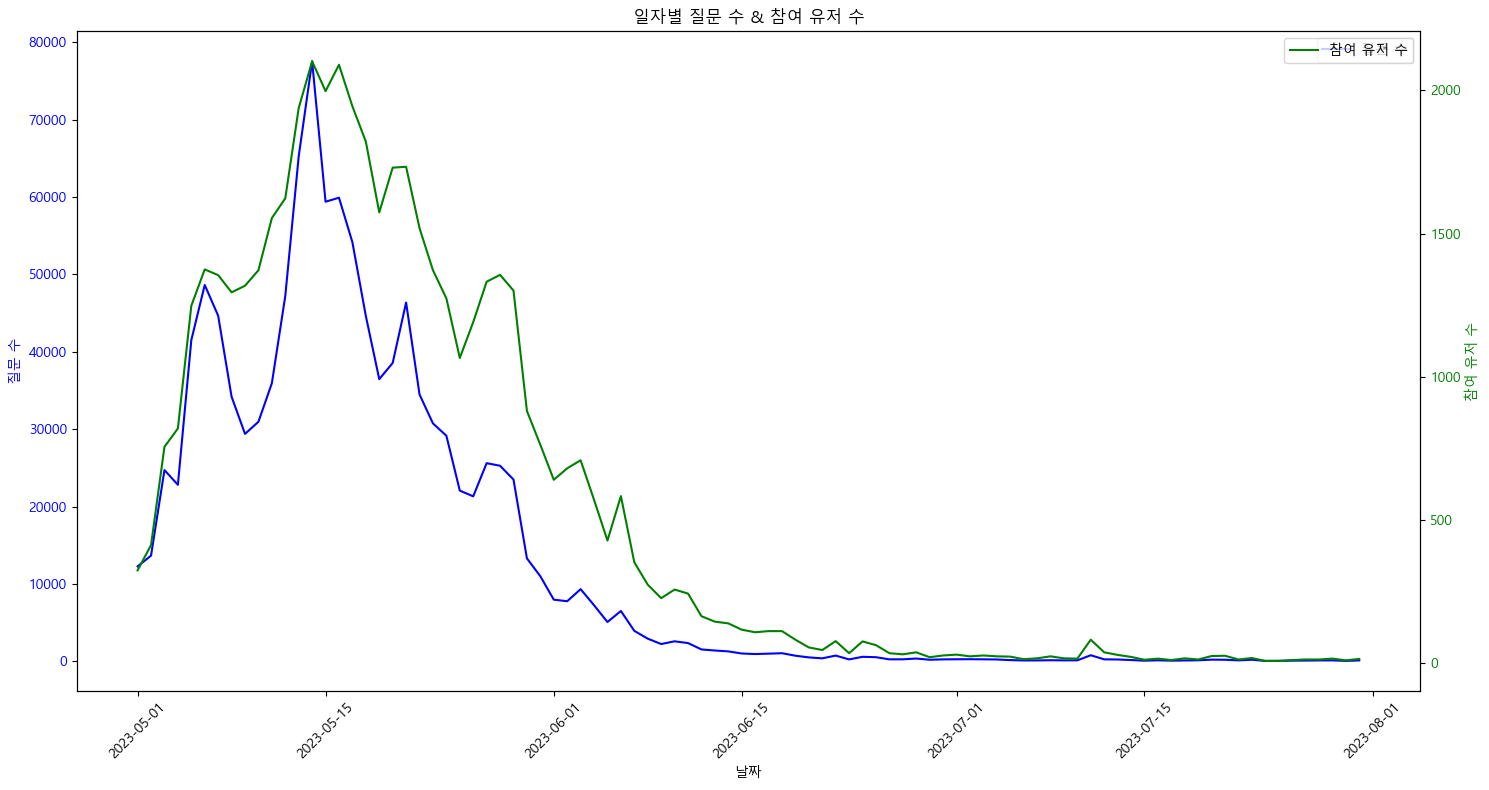

In [10]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# 첫 번째 y축 (질문 수)
sns.lineplot(x=daily_question_count.index, y=daily_question_count.values, ax=ax1, label='질문 수', color='blue')
ax1.set_ylabel("질문 수", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (참여 유저 수)
ax2 = ax1.twinx()
sns.lineplot(x=daily_user_count.index, y=daily_user_count.values, ax=ax2, label='참여 유저 수', color='green')
ax2.set_ylabel("참여 유저 수", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 공통 설정
ax1.set_title("일자별 질문 수 & 참여 유저 수")
ax1.set_xlabel("날짜")
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()


# **어떤 질문에 가장 많이 참여했는가?**

사람이 가장 많이 참여했던 2023년 5월부터 2023년 7월까지의 데이터를 기반으로 어떤 질문에 가장 많이 참여했는지 알아보기!

In [11]:
# 공통 조건 :2023년 5월 ~ 2023년 7월
where_query = "WHERE created_at < '2023-08-01' AND created_at >= '2023-05-01'"

# 투표 기록 테이블
accounts_userquestionrecord_df = load_data_from_bigquery(f"SELECT * FROM votes.accounts_userquestionrecord {where_query};")
display(accounts_userquestionrecord_df)

# 질문 테이블
polls_question_df = load_data_from_bigquery("SELECT * FROM votes.polls_question_add_category;")
display(polls_question_df)

Downloading: 100%|██████████|


id status          created_at  chosen_user_id  question_id  \
0          1503745      I 2023-05-01 04:52:05          850031          248   
1          1548731      I 2023-05-01 07:22:18          850031          147   
2          1664735      I 2023-05-01 11:59:48          858253          241   
3          1681510      I 2023-05-01 12:31:28          863409          143   
4          1687297      I 2023-05-01 12:42:48          856172          228   
...            ...    ...                 ...             ...          ...   
1181413  160053225      I 2023-07-27 02:24:28         1037925         3214   
1181414  160068408      I 2023-07-27 09:37:57         1154274         2702   
1181415  160115151      I 2023-07-28 07:59:41         1169212         1465   
1181416  160214578      I 2023-07-30 09:02:19          883391          593   
1181417  160262908      I 2023-07-31 16:06:28          865846         2253   

         user_id  question_piece_id  has_read answer_status  \
0         850249            1775532         1             N   
1         850736            1959508         1             N   
2         857101            2130014         1             N   
3         855748            2106132         1             N   
4         857422            2153384         1             N   
...          ...                ...       ...           ...   
1181413  1019885          196379884         1             N   
1181414  1210380          192436639         1             N   
1181415  1256702           93329166         1             N   
1181416  1302677          206061159         1             N   
1181417   866250          187023490         1             N   

          answer_updated_at  report_count  opened_times  
0       2023-05-01 04:52:05             0             3  
1       2023-05-01 07:22:18             0             3  
2       2023-05-01 11:59:48             0             3  
3       2023-05-01 12:31:28             0             3  
4       2023-05-01 12:42:48             0             3  
...                     ...           ...           ...  
1181413 2023-07-27 02:24:28             0             2  
1181414 2023-07-27 09:37:57             0             2  
1181415 2023-07-28 07:59:41             0             2  
1181416 2023-07-30 09:02:19             0             2  
1181417 2023-07-31 16:06:28             0             2  

[1181418 rows x 12 columns]

Downloading: 100%|██████████|


id                           question_text          created_at  \
0       99                      가장 신비한 매력이 있는 사람은? 2023-03-31 15:22:53   
1      100            "이 사람으로 한 번 살아보고 싶다" 하는 사람은? 2023-03-31 15:22:53   
2      101                               미래의 틱톡커는? 2023-03-31 15:22:54   
3      102                         여기서 제일 특이한 친구는? 2023-03-31 15:22:54   
4      103                         가장 지켜주고 싶은 사람은? 2023-03-31 15:22:55   
...    ...                                     ...                 ...   
5020  5129                         나에게 가장 중요한 사람은? 2023-06-06 06:15:52   
5021  5130                    오목을 제일 잘 할 것 같은 사람은? 2023-06-06 06:15:52   
5022  5131                가방에서 쓰레기가 안 나올 것 같은 사람은? 2023-06-06 06:15:52   
5023  5132  아무리 많은 숙제도 30분만에 다 끝내버릴 수 있을 것 같은 친구는? 2023-06-06 06:15:52   
5024  5133                  러브레터를 가장 잘 쓸 것 같은 사람은? 2023-06-06 06:15:52   

            category  
0       [연애, 성격, 감성]  
1     [심리, 상상, 인간관계]  
2      [미디어, 미래, 상상]  
3     [성격, 관찰, 인간관계]  
4     [심리, 일상, 인간관계]  
...              ...  
5020  [심리, 일상, 인간관계]  
5021    [일상, 지식, 관찰]  
5022    [일상, 성격, 관찰]  
5023    [일상, 성격, 관찰]  
5024    [연애, 감성, 대화]  

[5025 rows x 4 columns]

question_id  count                  question_text          category
0             170   1837  처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?    [성격, 대화, 인간관계]
1             169   1837       축제에서 공연을 제일 잘 할거 같은 사람은?     [일상, 스타일, 관찰]
2             211   1833    앞으로의 인생을 가장 재미있게 살것 같은 사람은?  [미래, 상상, 라이프스타일]
3             186   1816                           vote     [일상, 관찰, 미디어]
4             290   1796          모든 사람과 잘 지낼 것 같은 사람은?    [성격, 대화, 인간관계]
...           ...    ...                            ...               ...
4605         4693      1        옷 잘 입을 수 있게 도와줄 것 같은 친구   [일상, 스타일, 인간관계]
4606         4692      1          올해 안에 솔로탈출할 것 같은 사람은?      [연애, 미래, 심리]
4607         4164      1              같이 도서관 가고 싶은 사람은?    [일상, 대화, 인간관계]
4608         4385      1                 초콜릿 사줄 것 같은 친구    [일상, 감성, 인간관계]
4609         4279      1               하복이 제일 잘 어울리는사람!     [일상, 스타일, 관찰]

[4610 rows x 4 columns]

Text(0.5, 1.0, '2023년 5월 ~ 2023년 7월 가장 참여가 많았던 상위 20개 질문은?')

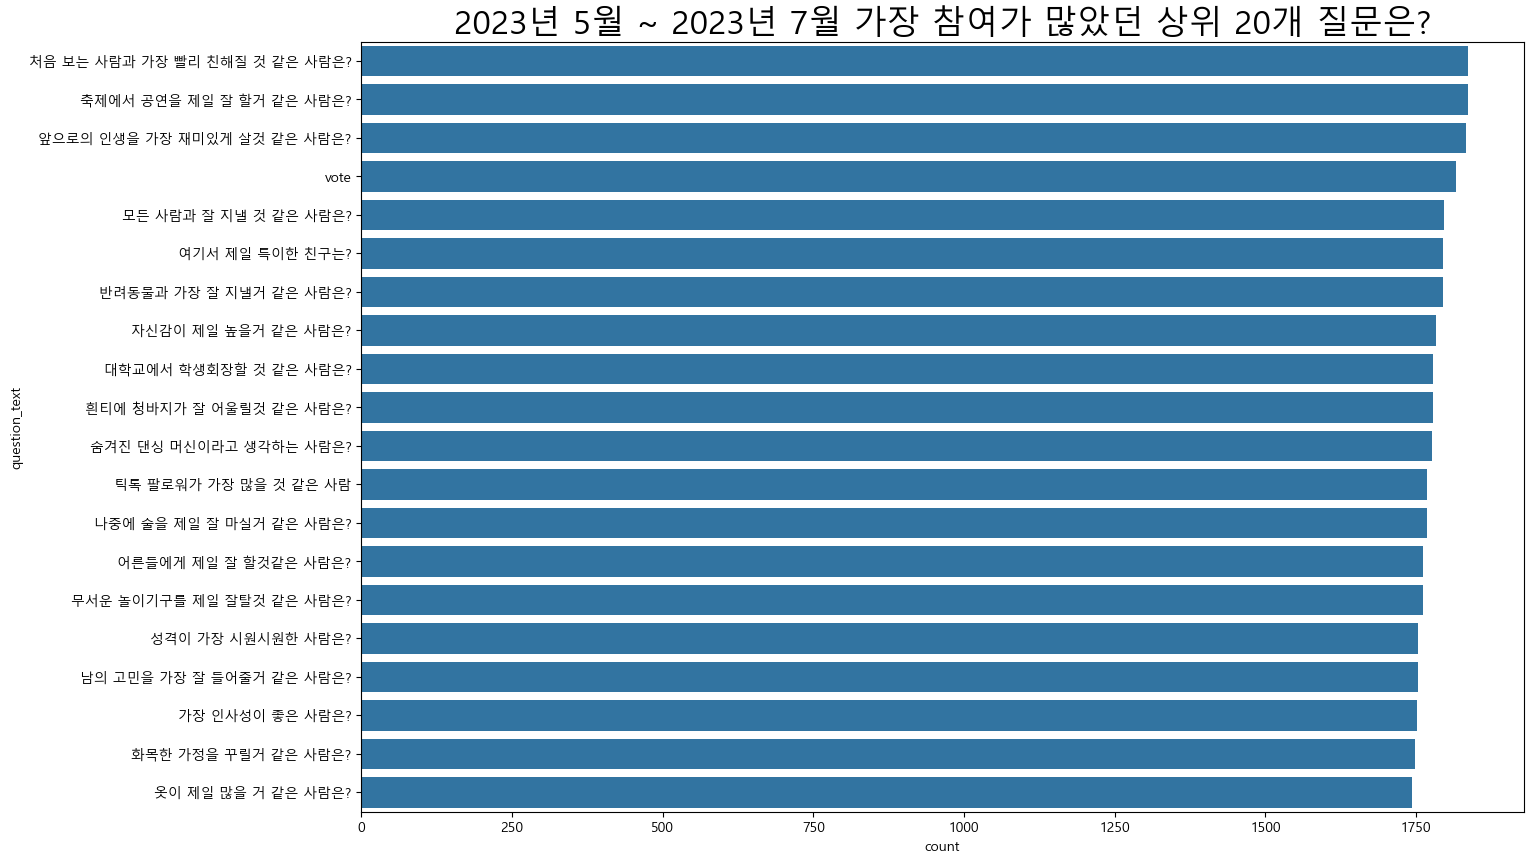

In [12]:
# 가장 참여가 많이 된 질문은?
favorite_votes = pd.merge(
    accounts_userquestionrecord_df[['question_id']].value_counts().reset_index(name='count'),
    polls_question_df[['id', 'question_text', 'category']],
    how='left',
    left_on='question_id',
    right_on='id'
).drop(labels='id', axis=1)

display(favorite_votes)

# 상위 20개를 bar graph로 출력
plt.figure(figsize=(15, 10))
sns.barplot(data=favorite_votes.head(20), x='count', y='question_text')
plt.title("2023년 5월 ~ 2023년 7월 가장 참여가 많았던 상위 20개 질문은?", fontsize=24)

# **질문의 카테고리 중에서 가장 인기가 많았던 카테고리는?**

In [13]:
favorite_votes = favorite_votes.explode(column='category')
display(favorite_votes)

question_id  count                  question_text category
0             170   1837  처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?       성격
0             170   1837  처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?       대화
0             170   1837  처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?     인간관계
1             169   1837       축제에서 공연을 제일 잘 할거 같은 사람은?       일상
1             169   1837       축제에서 공연을 제일 잘 할거 같은 사람은?      스타일
...           ...    ...                            ...      ...
4608         4385      1                 초콜릿 사줄 것 같은 친구       감성
4608         4385      1                 초콜릿 사줄 것 같은 친구     인간관계
4609         4279      1               하복이 제일 잘 어울리는사람!       일상
4609         4279      1               하복이 제일 잘 어울리는사람!      스타일
4609         4279      1               하복이 제일 잘 어울리는사람!       관찰

[13830 rows x 4 columns]

In [14]:
favorite_category = favorite_votes.groupby('category').agg(total_count = ('count', 'sum')).reset_index()
display(favorite_category)

category  total_count
0        감성       181135
1        건강          371
2        관계           30
3        관찰       346137
4        기억         1635
5        대화       101545
6    라이프스타일       121005
7       미디어        48374
8        미래       132998
9        미식           46
10       상상       135760
11       생존         2045
12       성격       461120
13       성장         1635
14       소비           34
15      스타일       224208
16        식          417
17      식생활           10
18       신체           53
19       심리       295302
20       여행         1481
21       역사           17
22       연애       124058
23        운          374
24       운동        32523
25       유머          432
26       음식         1553
27     인간관계       588340
28       일상       691108
29      자기애           19
30       지식        49788
31       취향          701

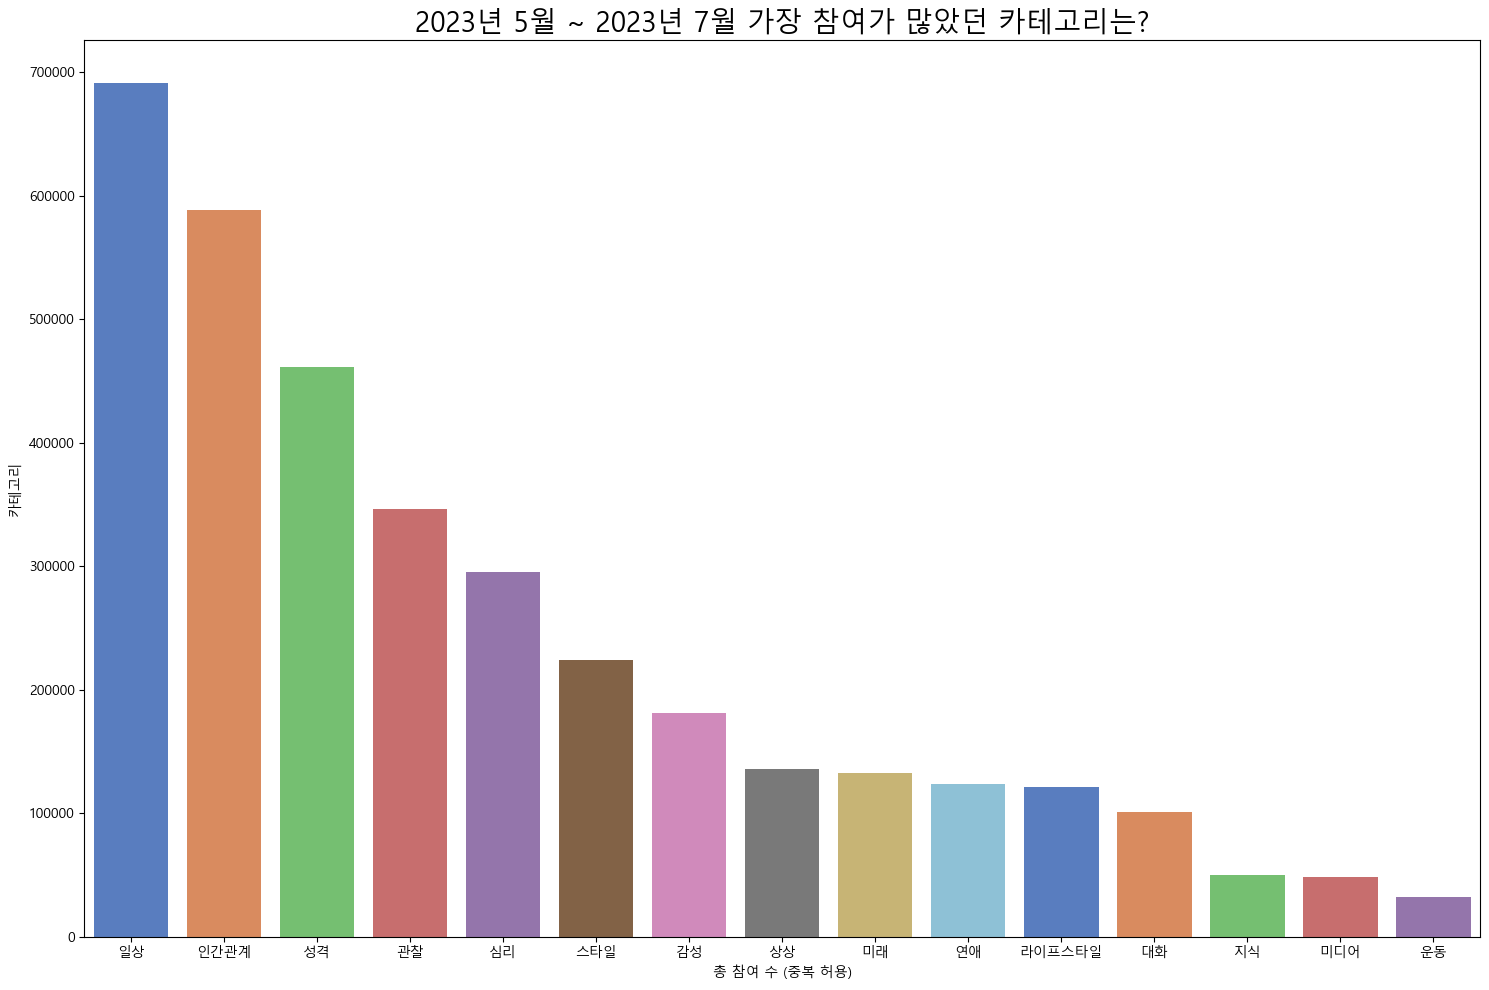

In [15]:
# 상위 20개를 bar graph로 출력
plt.figure(figsize=(15, 10))
sns.barplot(data=favorite_category.sort_values(by='total_count', ascending=False).head(15),
            x='category',
            y='total_count',
            palette='muted',
            legend=False)
plt.title("2023년 5월 ~ 2023년 7월 가장 참여가 많았던 카테고리는?", fontsize=20)
plt.xlabel("총 참여 수 (중복 허용)") # 텍스트를 읽는 화자의 의도에 따라 생각하는 카테고리가 다를 수 있으므로, 중복 집계를 허용
plt.ylabel("카테고리")
plt.tight_layout()
plt.show()

# **지역별 투표 참여 Frequency**

In [16]:
# 투표 기록 테이블
accounts_userquestionrecord_df = load_data_from_bigquery(f"SELECT created_at, user_id FROM votes.accounts_userquestionrecord WHERE created_at < '2023-08-01';")
display(accounts_userquestionrecord_df)

# 유저 테이블
accounts_user_df = load_data_from_bigquery("SELECT id, group_id FROM votes.accounts_user;")
display(accounts_user_df)

# 학교 테이블
accounts_school_df = load_data_from_bigquery("SELECT * FROM votes.accounts_school;")
display(accounts_school_df)

# 학급 테이블
accounts_group_df = load_data_from_bigquery("SELECT * FROM votes.accounts_group;")
display(accounts_group_df)

Downloading: 100%|██████████|


created_at  user_id
0       2023-04-29 13:22:05   851717
1       2023-04-29 14:49:06   849450
2       2023-04-30 03:29:48   850229
3       2023-04-30 07:43:10   857422
4       2023-04-30 07:58:36   855117
...                     ...      ...
1212211 2023-07-24 15:10:15  1113391
1212212 2023-07-27 02:24:28  1019885
1212213 2023-07-27 09:37:57  1210380
1212214 2023-07-30 09:02:19  1302677
1212215 2023-07-31 16:06:28   866250

[1212216 rows x 2 columns]

Downloading: 100%|██████████|


id  group_id
0        831956       NaN
1        831962      12.0
2        832151       1.0
3        832340       1.0
4        832520      12.0
...         ...       ...
677080  1583729   32442.0
677081  1583730   43949.0
677082  1583731   18640.0
677083  1583732   18640.0
677084  1583733   84546.0

[677085 rows x 2 columns]

Downloading: 100%|██████████|


id      address  student_count school_type
0        4     충청북도 충주시            239           H
1        6     충청북도 충주시            200           H
2        7     충청북도 충주시            114           H
3       13     충청북도 충주시             80           H
4       16     충청북도 충주시            143           H
...    ...          ...            ...         ...
5946  4971      경기도 안성시            155           M
5947  5025  경기도 안산시 단원구            155           M
5948  5063      경기도 시흥시            155           M
5949  5336      경기도 부천시            155           M
5950  5638   경기 용인시 기흥구            155           M

[5951 rows x 4 columns]

Downloading: 100%|██████████|


id  grade  class_num  school_id
0          1      1          1          1
1        227      1         20          1
2        660      1          7          1
3       1184      1          5          1
4       1191      1          8          1
...      ...    ...        ...        ...
84510  73315      3          1       5961
84511  82152      3          1       5963
84512  84171      3          1       5965
84513  32644      4         10       4658
84514  61647     20          7       3867

[84515 rows x 4 columns]

In [17]:
# 병합 전에 컬럼들의 dtype 맞추기
accounts_userquestionrecord_df['user_id'] = accounts_userquestionrecord_df['user_id'].astype('int64')
accounts_user_df['id'] = accounts_user_df['id'].astype('int64')

accounts_group_df['id'] = accounts_group_df['id'].astype('int64')

accounts_group_df['school_id'] = accounts_group_df['school_id'].astype('int64')
accounts_school_df['id'] = accounts_school_df['id'].astype('int64')

# 다시 병합
merged = accounts_userquestionrecord_df.merge(accounts_user_df, left_on='user_id', right_on='id')\
            .merge(accounts_group_df, left_on='group_id', right_on='id')\
            .merge(accounts_school_df, left_on='school_id', right_on='id')


display(merged)

created_at  user_id     id_x  group_id   id_y  grade  \
0       2023-04-29 13:22:05   851717   851717    3944.0   3944      2   
1       2023-04-29 08:14:16   851717   851717    3944.0   3944      2   
2       2023-04-29 08:14:42   851717   851717    3944.0   3944      2   
3       2023-04-29 09:07:23   851717   851717    3944.0   3944      2   
4       2023-04-29 09:08:09   851717   851717    3944.0   3944      2   
...                     ...      ...      ...       ...    ...    ...   
1212211 2023-05-25 17:20:53  1499419  1499419   70478.0  70478      3   
1212212 2023-05-25 17:21:06  1499419  1499419   70478.0  70478      3   
1212213 2023-05-25 17:21:21  1499419  1499419   70478.0  70478      3   
1212214 2023-05-25 17:21:27  1499419  1499419   70478.0  70478      3   
1212215 2023-05-25 17:21:40  1499419  1499419   70478.0  70478      3   

         class_num  school_id    id       address  student_count school_type  
0               13        271   271  충청남도 천안시 서북구            491           H  
1               13        271   271  충청남도 천안시 서북구            491           H  
2               13        271   271  충청남도 천안시 서북구            491           H  
3               13        271   271  충청남도 천안시 서북구            491           H  
4               13        271   271  충청남도 천안시 서북구            491           H  
...            ...        ...   ...           ...            ...         ...  
1212211          2       4426  4426      경상남도 거제시            483           H  
1212212          2       4426  4426      경상남도 거제시            483           H  
1212213          2       4426  4426      경상남도 거제시            483           H  
1212214          2       4426  4426      경상남도 거제시            483           H  
1212215          2       4426  4426      경상남도 거제시            483           H  

[1212216 rows x 12 columns]

In [18]:
daily_question_count = (
    merged
    .assign(date=merged['created_at'].dt.date)
    .groupby(['date', 'address'])
    .size()
).reset_index(name='count')

In [19]:
pd.DataFrame(daily_question_count)

date       address  count
0    2023-04-28  충청남도 천안시 서북구   3173
1    2023-04-29  충청남도 천안시 서북구  11405
2    2023-04-30  충청남도 천안시 서북구  16220
3    2023-05-01  충청남도 천안시 서북구  12274
4    2023-05-02       경기도 화성시    188
..          ...           ...    ...
695  2023-07-31      경기도 남양주시      7
696  2023-07-31      경상남도 거제시      8
697  2023-07-31     울산광역시 울주군     38
698  2023-07-31      충청남도 아산시     38
699  2023-07-31  충청남도 천안시 서북구     24

[700 rows x 3 columns]

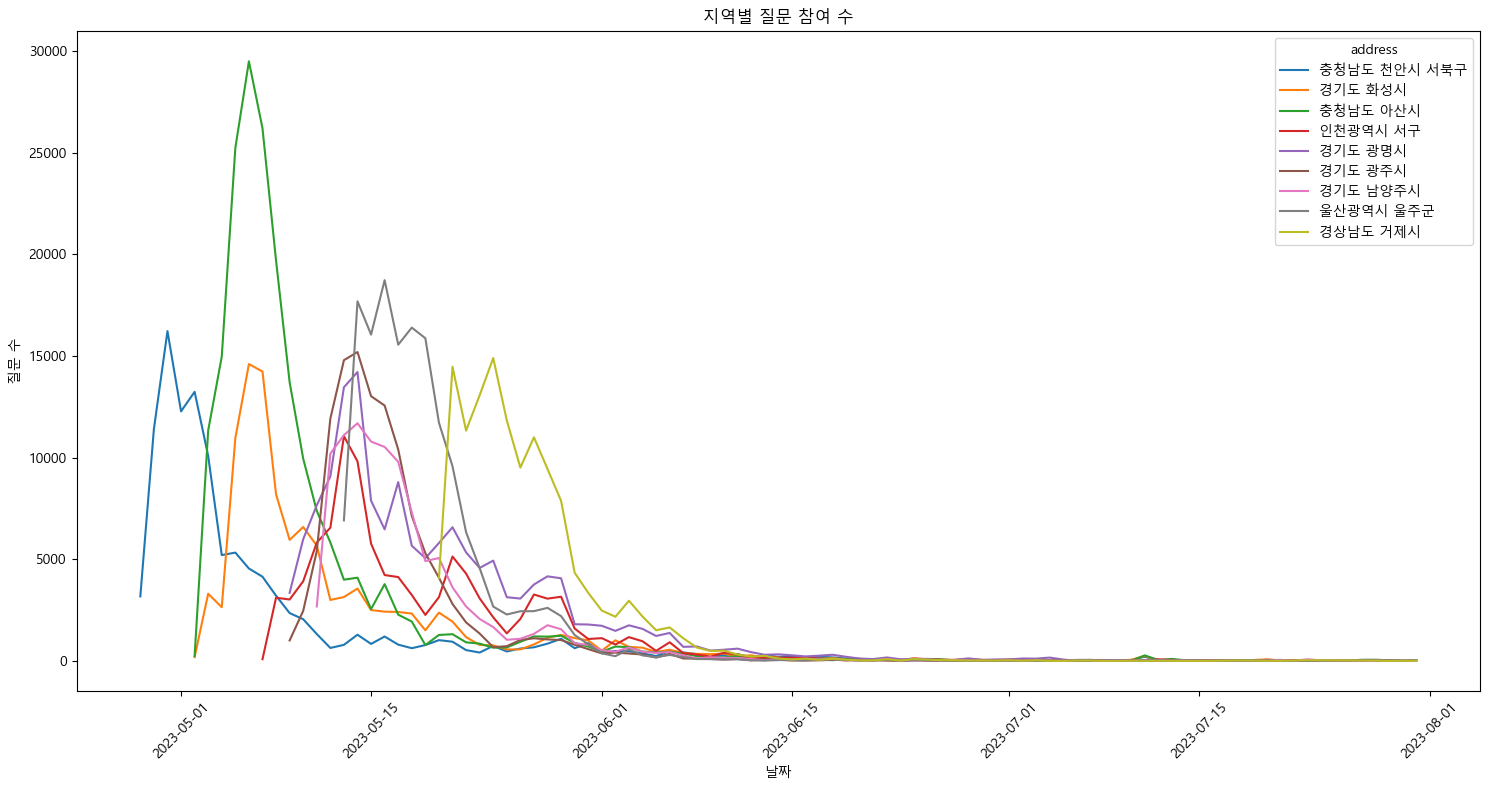

In [20]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# 첫 번째 y축 (질문 수)
sns.lineplot(data=daily_question_count, x='date', y='count', hue='address')
ax1.set_ylabel("질문 수")

# 공통 설정
ax1.set_title("지역별 질문 참여 수")
ax1.set_xlabel("날짜")
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

In [21]:
del accounts_group_df, accounts_school_df, accounts_user_df, accounts_userquestionrecord_df, merged, daily_question_count

# **지역별 가입자 수 추이**

In [22]:
# 유저 테이블
accounts_user_df = load_data_from_bigquery("SELECT id, created_at, group_id FROM votes.accounts_user WHERE created_at < '2023-08-01';")
display(accounts_user_df)

# 학교 테이블
accounts_school_df = load_data_from_bigquery("SELECT * FROM votes.accounts_school;")
display(accounts_school_df)

# 학급 테이블
accounts_group_df = load_data_from_bigquery("SELECT * FROM votes.accounts_group;")
display(accounts_group_df)

Downloading: 100%|██████████|


id                 created_at  group_id
0        831956 2023-03-29 03:44:14.047130       NaN
1        831962 2023-03-29 05:18:56.162368      12.0
2        832151 2023-03-29 12:56:34.989468       1.0
3        832340 2023-03-29 12:56:35.020790       1.0
4        832520 2023-03-29 12:56:35.049311      12.0
...         ...                        ...       ...
673179  1579640 2023-07-31 16:40:15.522415   81557.0
673180  1579641 2023-07-31 16:48:48.598009   32088.0
673181  1579642 2023-07-31 16:52:27.877076   10260.0
673182  1579643 2023-07-31 17:48:00.152054   28720.0
673183  1579644 2023-07-31 21:03:26.997169   19490.0

[673184 rows x 3 columns]

Downloading: 100%|██████████|


id      address  student_count school_type
0        4     충청북도 충주시            239           H
1        6     충청북도 충주시            200           H
2        7     충청북도 충주시            114           H
3       13     충청북도 충주시             80           H
4       16     충청북도 충주시            143           H
...    ...          ...            ...         ...
5946  4971      경기도 안성시            155           M
5947  5025  경기도 안산시 단원구            155           M
5948  5063      경기도 시흥시            155           M
5949  5336      경기도 부천시            155           M
5950  5638   경기 용인시 기흥구            155           M

[5951 rows x 4 columns]

Downloading: 100%|██████████|


id  grade  class_num  school_id
0          1      1          1          1
1        227      1         20          1
2        660      1          7          1
3       1184      1          5          1
4       1191      1          8          1
...      ...    ...        ...        ...
84510  73315      3          1       5961
84511  82152      3          1       5963
84512  84171      3          1       5965
84513  32644      4         10       4658
84514  61647     20          7       3867

[84515 rows x 4 columns]

In [23]:
accounts_user_df['id'] = accounts_user_df['id'].astype('int64')
accounts_group_df['id'] = accounts_group_df['id'].astype('int64')
accounts_group_df['school_id'] = accounts_group_df['school_id'].astype('int64')
accounts_school_df['id'] = accounts_school_df['id'].astype('int64')

merged = accounts_user_df.merge(accounts_group_df, left_on='group_id', right_on='id')\
            .merge(accounts_school_df, left_on='school_id', right_on='id')

display(merged)

id_x                 created_at  group_id   id_y  grade  class_num  \
0        833024 2023-03-31 09:05:51.903699      35.0     35      1         10   
1       1005101 2023-05-08 11:17:03.922400      35.0     35      1         10   
2       1190758 2023-05-13 00:47:22.271190      35.0     35      1         10   
3       1230027 2023-05-13 14:28:32.373961      35.0     35      1         10   
4       1236559 2023-05-13 16:16:35.623913      35.0     35      1         10   
...         ...                        ...       ...    ...    ...        ...   
673092  1577919 2023-07-08 12:53:25.827262   83916.0  83916      3          1   
673093  1579162 2023-07-20 12:49:32.065000   84010.0  84010      2          1   
673094  1579415 2023-07-25 06:17:05.602619   84036.0  84036      2          2   
673095  1579448 2023-07-25 16:12:36.906006   84039.0  84039      1          1   
673096  1579532 2023-07-28 01:22:49.320501   84046.0  84046      1          2   

        school_id    id       address  student_count school_type  
0            5464  5464       경기도 군포시            158           H  
1            5464  5464       경기도 군포시            158           H  
2            5464  5464       경기도 군포시            158           H  
3            5464  5464       경기도 군포시            158           H  
4            5464  5464       경기도 군포시            158           H  
...           ...   ...           ...            ...         ...  
673092       3532  3532   경상북도 포항시 북구              1           M  
673093       5949  5949             -              1           H  
673094        677   677  전라북도 전주시 완산구              1           H  
673095       1086  1086      전라남도 영암군              1           H  
673096       3053  3053      대전광역시 서구              1           H  

[673097 rows x 11 columns]

In [24]:
# 전국 단위의 광역시도 기준으로 count
merged['address'] = merged['address'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)

# 주소 앞 자리에 '대한민국' 을 포함하는 경우 그 데이터를 삭제 후 주소 표기
merged['address'] = merged['address'].apply(
    lambda x: x.replace('대한민국', '').strip() if isinstance(x, str) else x
)

# 전국 단위로 입력되어 있는 데이터가 축약 표시로 되어 있다면, 풀어서 표시 (예시 : 경남 -> 경상남도)
province_map = {
    '서울': '서울특별시',
    '부산': '부산광역시',
    '대구': '대구광역시',
    '인천': '인천광역시',
    '광주': '광주광역시',
    '대전': '대전광역시',
    '울산': '울산광역시',
    '세종': '세종특별자치시',
    '경기': '경기도',
    '강원': '강원도',
    '충북': '충청북도',
    '충남': '충청남도',
    '전북': '전라북도',
    '전남': '전라남도',
    '경북': '경상북도',
    '경남': '경상남도',
    '제주': '제주특별자치도'
}

merged['address'] = merged['address'].map(province_map).fillna(merged['address'])

# created_at 기준으로 데이터 groupby
user_count_by_area = (
    merged
    .assign(date=merged['created_at'].dt.date)
    .groupby(['date', 'address'])
    .size()
).reset_index(name='count')

# address가 '-' 인 데이터 삭제
user_count_by_area = user_count_by_area[user_count_by_area['address'] != '-']

display(user_count_by_area)

date address  count
0     2023-03-31     경기도      1
1     2023-03-31    충청남도     21
2     2023-04-01     경기도      2
3     2023-04-01    충청남도     14
4     2023-04-02    충청남도      1
...          ...     ...    ...
1557  2023-07-31   대전광역시      2
1558  2023-07-31   부산광역시      1
1559  2023-07-31   서울특별시      4
1560  2023-07-31   인천광역시      3
1561  2023-07-31    충청남도      3

[1560 rows x 3 columns]

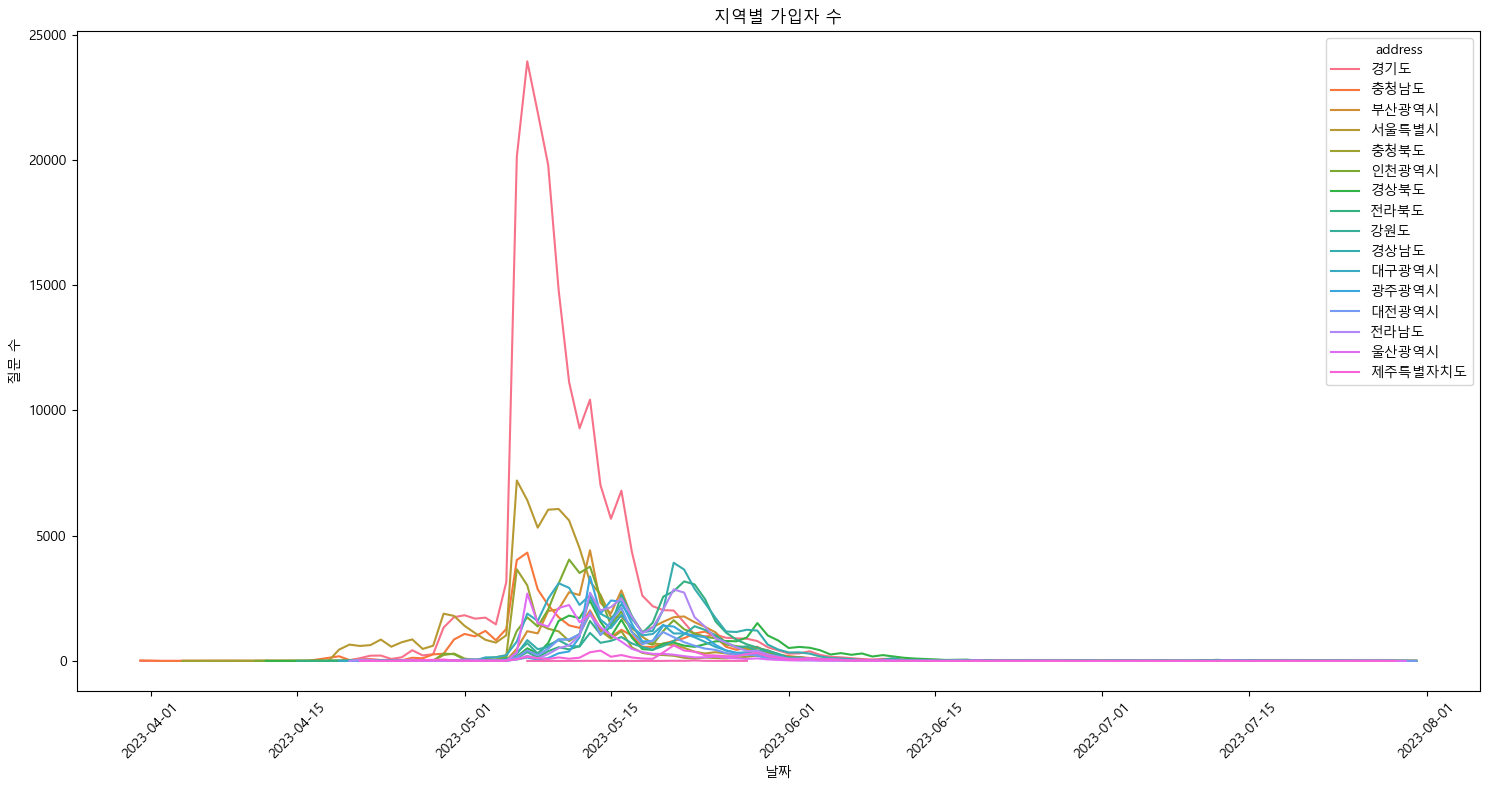

In [25]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# 첫 번째 y축 (질문 수)
sns.lineplot(data=user_count_by_area, x='date', y='count', hue='address')
ax1.set_ylabel("질문 수")

# 공통 설정
ax1.set_title("지역별 가입자 수")
ax1.set_xlabel("날짜")
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

In [26]:
del accounts_group_df, accounts_school_df, accounts_user_df, merged, province_map, user_count_by_area

# **유저 신고 관련 파헤치기**

In [27]:
timelinereport_df = load_data_from_bigquery("SELECT * FROM votes.accounts_timelinereport;")

Downloading: 100%|██████████|


In [28]:
questionset_df = load_data_from_bigquery("SELECT * FROM votes.polls_questionset")

Downloading: 100%|██████████|


In [29]:
userquestionrecord_df = load_data_from_bigquery("SELECT * FROM votes.accounts_userquestionrecord;")

Downloading: 100%|██████████|


In [30]:
timelinereport_df['reason'].unique()

array(['광고', '선정적이거나 폭력적인 내용', '친구를 비하하거나 조롱하는 어투', '타인을 사칭함', '허위 사실 언급'],
      dtype=object)

In [31]:
timelinereport_df[timelinereport_df['reason'] == '허위 사실 언급']

id    reason          created_at  reported_user_id  user_id  \
128     64  허위 사실 언급 2023-05-06 07:07:46            888610   893684   
129     65  허위 사실 언급 2023-05-06 07:07:52            888610   893684   
130     73  허위 사실 언급 2023-05-06 07:24:39            884536   895569   
131     86  허위 사실 언급 2023-05-06 07:49:27            895726   887254   
132    145  허위 사실 언급 2023-05-06 09:28:26            876060   887254   
..     ...       ...                 ...               ...      ...   
203  17844  허위 사실 언급 2023-05-23 22:50:21           1408262  1401647   
204  21606  허위 사실 언급 2023-05-29 11:39:09           1479859  1402487   
205  21761  허위 사실 언급 2023-05-29 14:09:03           1448785  1460473   
206  22634  허위 사실 언급 2023-05-31 10:33:00           1551005  1161757   
207  22635  허위 사실 언급 2023-05-31 10:33:06           1551005  1161757   

     user_question_record_id  
128                  4143049  
129                  4143049  
130                  4198891  
131                  4210703  
132                  4265440  
..                       ...  
203                102133321  
204                129879776  
205                130511263  
206                135982670  
207                134909577  

[80 rows x 6 columns]

In [32]:
questionset_df['question_piece_id_list'] = questionset_df['question_piece_id_list'].apply(ast.literal_eval)
questionset_df = questionset_df.explode(column='question_piece_id_list')

In [33]:
questionset_df['question_piece_id_list'] = questionset_df['question_piece_id_list'].astype(int)

In [34]:
# for문을 돌리기 위한 리스트 생성
reason = '허위 사실 언급'

user_id_list = timelinereport_df[timelinereport_df['reason'] == reason]['user_id'].to_list()
user_question_record_id_list = timelinereport_df[timelinereport_df['reason'] == reason]['user_question_record_id'].to_list()

count = 1
for user_id, user_question_record_id in zip(user_id_list, user_question_record_id_list):
    # 해당 user_question_record_id를 참조하여 question_piece_id를 검색
    question_piece_id = userquestionrecord_df[userquestionrecord_df['id'] == user_question_record_id]['question_piece_id'].values[0]

    # 테스트 데이터프레임 생성
    test_df = questionset_df[
        (questionset_df['user_id'] == user_id) &
        (questionset_df['question_piece_id_list'] == question_piece_id)
    ]

    # 데이터프레임이 비어있는지 확인
    is_matched = not test_df.empty

    if is_matched:
        # 조건을 만족하는 경우 실행할 코드
        print(f"user_id {user_id} matched with question_piece_id {question_piece_id}")
        display(test_df)
        print(f"count : {count}")
        count += 1

user_id 893684 matched with question_piece_id 5325978


id  question_piece_id_list        opening_time status  \
48144  532569                 5325978 2023-05-06 05:51:57      F   

               created_at  user_id  
48144 2023-05-06 05:01:57   893684

count : 1
user_id 893684 matched with question_piece_id 5325978


id  question_piece_id_list        opening_time status  \
48144  532569                 5325978 2023-05-06 05:51:57      F   

               created_at  user_id  
48144 2023-05-06 05:01:57   893684

count : 2
user_id 887254 matched with question_piece_id 5415314


id  question_piece_id_list        opening_time status  \
44446  541502                 5415314 2023-05-06 07:32:57      F   

               created_at  user_id  
44446 2023-05-06 06:42:57   887254

count : 3
user_id 887254 matched with question_piece_id 5466870


id  question_piece_id_list        opening_time status  \
44447  546658                 5466870 2023-05-06 08:26:29      F   

               created_at  user_id  
44447 2023-05-06 07:36:29   887254

count : 4
user_id 878909 matched with question_piece_id 5565074


id  question_piece_id_list        opening_time status  \
31107  556478                 5565074 2023-05-06 09:15:48      F   

               created_at  user_id  
31107 2023-05-06 08:25:48   878909

count : 5
user_id 885300 matched with question_piece_id 5615398


id  question_piece_id_list        opening_time status  \
40360  561511                 5615398 2023-05-06 09:37:58      F   

               created_at  user_id  
40360 2023-05-06 08:47:58   885300

count : 6
user_id 1002212 matched with question_piece_id 16721421


id  question_piece_id_list        opening_time status  \
59299  1672113                16721421 2023-05-09 08:49:33      F   

               created_at  user_id  
59299 2023-05-09 08:49:33  1002212

count : 7
user_id 1115498 matched with question_piece_id 28026908


id  question_piece_id_list        opening_time status  \
76714  2802662                28026908 2023-05-11 03:01:53      F   

               created_at  user_id  
76714 2023-05-11 02:11:53  1115498

count : 8
user_id 1115498 matched with question_piece_id 28026908


id  question_piece_id_list        opening_time status  \
76714  2802662                28026908 2023-05-11 03:01:53      F   

               created_at  user_id  
76714 2023-05-11 02:11:53  1115498

count : 9
user_id 1131924 matched with question_piece_id 32407037


id  question_piece_id_list        opening_time status  \
80622  3240669                32407037 2023-05-11 14:55:08      F   

               created_at  user_id  
80622 2023-05-11 14:05:08  1131924

count : 10
user_id 1137878 matched with question_piece_id 35091624


id  question_piece_id_list        opening_time status  \
82298  3509133                35091624 2023-05-12 01:27:38      F   

               created_at  user_id  
82298 2023-05-12 00:47:38  1137878

count : 11
user_id 1190082 matched with question_piece_id 53383277


id  question_piece_id_list        opening_time status  \
99769  5338297                53383277 2023-05-14 02:29:39      F   

               created_at  user_id  
99769 2023-05-14 01:49:39  1190082

count : 12
user_id 1216979 matched with question_piece_id 62656089


id  question_piece_id_list        opening_time status  \
106879  6265577                62656089 2023-05-14 23:57:32      F   

                created_at  user_id  
106879 2023-05-14 23:17:32  1216979

count : 13
user_id 866940 matched with question_piece_id 58888958


id  question_piece_id_list        opening_time status  \
15810  5888867                58888958 2023-05-14 12:27:53      F   

               created_at  user_id  
15810 2023-05-14 11:47:53   866940

count : 14
user_id 866940 matched with question_piece_id 58888958


id  question_piece_id_list        opening_time status  \
15810  5888867                58888958 2023-05-14 12:27:53      F   

               created_at  user_id  
15810 2023-05-14 11:47:53   866940

count : 15
user_id 1296100 matched with question_piece_id 74752610


id  question_piece_id_list        opening_time status  \
122121  7475230                74752610 2023-05-16 11:22:40      F   

                created_at  user_id  
122121 2023-05-16 10:42:40  1296100

count : 16
user_id 881335 matched with question_piece_id 79058414


id  question_piece_id_list        opening_time status  \
34360  7905813                79058414 2023-05-16 22:52:46      F   

               created_at  user_id  
34360 2023-05-16 22:12:47   881335

count : 17
user_id 1169723 matched with question_piece_id 84727709


id  question_piece_id_list        opening_time status  \
94491  8472742                84727709 2023-05-17 12:50:40      F   

               created_at  user_id  
94491 2023-05-17 12:10:40  1169723

count : 18
user_id 1343904 matched with question_piece_id 104740682


id  question_piece_id_list        opening_time status  \
126724  10474038               104740682 2023-05-20 07:27:55      F   

                created_at  user_id  
126724 2023-05-20 06:47:56  1343904

count : 19
user_id 1257994 matched with question_piece_id 109069053


id  question_piece_id_list        opening_time status  \
115111  10906876               109069053 2023-05-20 16:09:50      F   

                created_at  user_id  
115111 2023-05-20 15:29:50  1257994

count : 20
user_id 1253264 matched with question_piece_id 112172199


id  question_piece_id_list        opening_time status  \
114261  11217191               112172199 2023-05-21 05:55:14      F   

                created_at  user_id  
114261 2023-05-21 05:15:15  1253264

count : 21
user_id 1319092 matched with question_piece_id 95722203


id  question_piece_id_list        opening_time status  \
157480  9572191                95722203 2023-05-19 00:03:59      O   

                created_at  user_id  
157480 2023-05-18 23:23:59  1319092

count : 22
user_id 1319092 matched with question_piece_id 95722203


id  question_piece_id_list        opening_time status  \
157480  9572191                95722203 2023-05-19 00:03:59      O   

                created_at  user_id  
157480 2023-05-18 23:23:59  1319092

count : 23
user_id 1401647 matched with question_piece_id 131047654


id  question_piece_id_list        opening_time status  \
132986  13104736               131047654 2023-05-23 20:49:06      F   

                created_at  user_id  
132986 2023-05-23 20:09:06  1401647

count : 24


In [35]:
userquestionrecord_df[userquestionrecord_df['id'] == 28992803]['question_piece_id'].values[0]

38127700

In [36]:
userquestionrecord_df[['question_piece_id']].merge(
    questionset_df[['question_piece_id_list']],
    how='inner',
    left_on='question_piece_id',
    right_on='question_piece_id_list').drop_duplicates(subset='question_piece_id')

question_piece_id  question_piece_id_list
0                  1213085                 1213085
1                  1235436                 1235436
2                  1395859                 1395859
3                  1509130                 1509130
4                  1511169                 1511169
...                    ...                     ...
1217553          207529811               207529811
1217554          205058859               205058859
1217555          208157659               208157659
1217556          195433327               195433327
1217557          208176263               208176263

[1217558 rows x 2 columns]

## **결론**

### 유저 신고를 하는 과정

1. 어떤 유저가 질문셋에 들어가서 투표를 함
2. 맘에 안드는 게 있음
3. 그럼 그 유저를 신고한다

유저를 신고하는 과정은 투표 중에 진행되지만, **해당 유저와 매칭이 되는 경우가 많이 없었음**

**즉, `votes.timelinereport` 테이블은 생각보다 오류가 많다.**

다른 방면에서도 신고를 할 수 있는 것으로 보이지만, 이를 파악하기 위해 hackle 데이터를 볼려 했으나... hackle에는 신고로 넘어가는 이벤트 발생건이 존재하지 않아서 포기

# **투표한 유저의 리텐션 (by 금희)**

In [37]:
userquestionrecord_df = load_data_from_bigquery("SELECT * FROM votes.accounts_userquestionrecord;")

Downloading: 100%|██████████|


In [38]:
userquestionrecord_df.head()

id status          created_at  chosen_user_id  question_id  user_id  \
0   945319      I 2023-04-29 13:22:05          849995          132   851717   
1   978922      I 2023-04-29 14:49:06          849922          180   849450   
2  1095692      I 2023-04-30 03:29:48          850031          132   850229   
3  1167181      I 2023-04-30 07:43:10          856172          116   857422   
4  1171173      I 2023-04-30 07:58:36          855039          132   855117   

   question_piece_id  has_read answer_status   answer_updated_at  \
0            1213085         1             P 2023-05-06 10:31:30   
1            1235436         1             N 2023-04-29 14:49:06   
2            1395859         1             N 2023-04-30 03:29:48   
3            1509130         1             N 2023-04-30 07:43:10   
4            1511169         1             N 2023-04-30 07:58:36   

   report_count  opened_times  
0             0             3  
1             0             3  
2             0             3  
3             0             3  
4             0             3

In [39]:
# 투표 날짜 컬럼 년-월-일로 생성
userquestionrecord_df = userquestionrecord_df.copy()
userquestionrecord_df['vote_date'] = userquestionrecord_df['created_at'].dt.date

In [40]:
userquestionrecord_df.head()

id status          created_at  chosen_user_id  question_id  user_id  \
0   945319      I 2023-04-29 13:22:05          849995          132   851717   
1   978922      I 2023-04-29 14:49:06          849922          180   849450   
2  1095692      I 2023-04-30 03:29:48          850031          132   850229   
3  1167181      I 2023-04-30 07:43:10          856172          116   857422   
4  1171173      I 2023-04-30 07:58:36          855039          132   855117   

   question_piece_id  has_read answer_status   answer_updated_at  \
0            1213085         1             P 2023-05-06 10:31:30   
1            1235436         1             N 2023-04-29 14:49:06   
2            1395859         1             N 2023-04-30 03:29:48   
3            1509130         1             N 2023-04-30 07:43:10   
4            1511169         1             N 2023-04-30 07:58:36   

   report_count  opened_times   vote_date  
0             0             3  2023-04-29  
1             0             3  2023-04-29  
2             0             3  2023-04-30  
3             0             3  2023-04-30  
4             0             3  2023-04-30

In [41]:
# 각 유저별 일별 투표 수 및 순서(투표 순서)

#  유저별 + 날짜별 투표 수 집계
user_daily_vote_df = (
    userquestionrecord_df
    .groupby(['user_id', 'vote_date'])
    .size()
    .reset_index(name='daily_vote_count')
)
# 유저별 투표 날짜 순 정렬
user_daily_vote_df = user_daily_vote_df.sort_values(['user_id', 'vote_date'])

# 유저별로 투표 순서 번호 붙이기
user_daily_vote_df['vote_sequence'] = (
    user_daily_vote_df
    .groupby('user_id')
    .cumcount() + 1  # 0부터 시작하므로 +1
)

user_daily_vote_df

user_id   vote_date  daily_vote_count  vote_sequence
0       838023  2023-04-29                 1              1
1       838023  2023-04-30                 6              2
2       838023  2023-05-02                 1              3
3       838023  2023-05-03                10              4
4       838023  2023-05-04                 4              5
...        ...         ...               ...            ...
50969  1579418  2023-07-29                 7              4
50970  1579418  2023-07-30                 1              5
50971  1579418  2023-08-05                 8              6
50972  1580578  2023-09-20                 2              1
50973  1583358  2024-03-19                 2              1

[50974 rows x 4 columns]

In [42]:
# 1. first_vote_date 기준으로 코호트 날짜 설정(유저별로 첫 투표 날짜(min))
vote_df = user_daily_vote_df.copy()
vote_df['first_vote_date'] = vote_df.groupby('user_id')['vote_date'].transform('min')

# 2. 가입일 기준 n일차 계산(첫날은 0일)
vote_df['day_n'] = (pd.to_datetime(vote_df['vote_date']) - pd.to_datetime(vote_df['first_vote_date'])).dt.days

# 3. 유저 수 집계 (코호트일, day_n 기준으로 몇 명이 활동했는가)
cohort_table = (
    vote_df
    .groupby(['first_vote_date', 'day_n'])['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'active_users'})
)

# 4. 코호트별 전체 유저 수 (Day 0 기준 유입자 수(해당 날짜가 첫 투표일임))
cohort_sizes = (
    cohort_table[cohort_table['day_n'] == 0]
    .rename(columns={'active_users': 'cohort_size'})[['first_vote_date', 'cohort_size']]
)

# 5. 병합하여 리텐션율 계산
cohort_table = cohort_table.merge(cohort_sizes, on='first_vote_date')
cohort_table['retention_rate'] = (cohort_table['active_users'] / cohort_table['cohort_size'] * 100).round(2)

# 6. 피벗 테이블 변환
cohort_retention = cohort_table.pivot(index='first_vote_date', columns='day_n', values='retention_rate').fillna(0)

# 7. 각 코호트별 투표 유저 수 추가

In [43]:
# 6월 첫째주까지 남은 피봇 다시 생성하기
cohort_retention

day_n              0       1       2       3       4       5       6    \
first_vote_date                                                          
2023-04-28       100.0   97.60   90.40   80.80   90.40   72.00   61.60   
2023-04-29       100.0   98.99   85.86   89.90   83.84   67.68   63.64   
2023-04-30       100.0   90.35   94.74   89.47   69.30   70.18   71.93   
2023-05-01       100.0   86.11   83.33   63.89   72.22   55.56   63.89   
2023-05-02       100.0   94.44   83.33   83.33   83.33   81.94   62.50   
2023-05-03       100.0   90.60   92.17   87.73   82.25   68.41   60.84   
2023-05-04       100.0   92.81   90.42   83.83   63.47   55.69   49.70   
2023-05-05       100.0   93.81   85.78   75.92   59.40   56.88   43.81   
2023-05-06       100.0   88.52   81.42   71.04   57.38   54.10   38.25   
2023-05-07       100.0   89.52   73.33   72.38   55.24   50.48   55.24   
2023-05-08       100.0   80.54   77.85   83.89   66.44   61.07   61.74   
2023-05-09       100.0   91.34   88.74   83.12   84.42   83.98   76.19   
2023-05-10       100.0   92.49   85.55   84.39   82.66   77.46   69.94   
2023-05-11       100.0   92.05   90.96   85.48   77.53   69.86   69.04   
2023-05-12       100.0   94.84   90.97   85.48   80.65   73.55   62.90   
2023-05-13       100.0   94.16   86.47   81.70   75.07   65.52   60.21   
2023-05-14       100.0   91.88   90.00   82.50   77.50   66.25   64.38   
2023-05-15       100.0   88.61   85.64   77.23   58.42   53.96   49.01   
2023-05-16       100.0   91.60   84.03   73.95   70.59   57.98   46.22   
2023-05-17       100.0   88.41   81.16   76.81   66.67   55.07   42.03   
2023-05-18       100.0   89.58   86.46   80.21   65.62   57.29   51.04   
2023-05-19       100.0   84.21   80.70   75.44   64.91   47.37   38.60   
2023-05-20       100.0   97.55   95.09   87.73   85.89   74.85   73.01   
2023-05-21       100.0   91.53   83.60   78.31   66.67   65.61   61.38   
2023-05-22       100.0   89.78   86.13   75.18   64.96   69.34   68.61   
2023-05-23       100.0   90.80   87.36   79.31   77.01   73.56   58.62   
2023-05-24       100.0   76.47   75.00   70.59   69.12   63.24   50.00   
2023-05-25       100.0   87.10   80.65   70.97   70.97   58.06   45.16   
2023-05-26       100.0   73.68   63.16   78.95   57.89   57.89   63.16   
2023-05-27       100.0   81.82   63.64   54.55   59.09   40.91   36.36   
2023-05-28       100.0   85.71   71.43   57.14   35.71   71.43   64.29   
2023-05-29       100.0   62.50   62.50   33.33   45.83   41.67   33.33   
2023-05-30       100.0   72.22   44.44   61.11   55.56   55.56   55.56   
2023-05-31       100.0   42.86   42.86   57.14   28.57   28.57   28.57   
2023-06-01       100.0    0.00  100.00  100.00  100.00    0.00    0.00   
2023-06-02       100.0  100.00   60.00  100.00   60.00   40.00   60.00   
2023-06-03       100.0  100.00  100.00  100.00   50.00    0.00    0.00   
2023-06-04       100.0  100.00   50.00   50.00    0.00    0.00  100.00   
2023-06-05       100.0   50.00    0.00   50.00    0.00   50.00    0.00   
2023-06-06       100.0    0.00    0.00    0.00    0.00    0.00    0.00   
2023-06-07       100.0  100.00  100.00  100.00    0.00   50.00    0.00   
2023-06-08       100.0    0.00    0.00  100.00    0.00    0.00    0.00   
2023-06-10       100.0    0.00    0.00  100.00  100.00    0.00    0.00   
2023-06-11       100.0  100.00  100.00    0.00    0.00    0.00    0.00   
2023-06-12       100.0    0.00    0.00    0.00    0.00    0.00    0.00   
2023-06-13       100.0    0.00    0.00    0.00    0.00    0.00    0.00   
2023-06-15       100.0    0.00    0.00    0.00    0.00    0.00    0.00   
2023-06-16       100.0   33.33    0.00    0.00    0.00    0.00    0.00   
2023-06-17       100.0    0.00    0.00    0.00    0.00    0.00    0.00   
2023-06-18       100.0    0.00    0.00    0.00  100.00  100.00    0.00   
2023-06-20       100.0    0.00    0.00    0.00    0.00    0.00    0.00   
2023-06-24       100.0  100.00    0.00    0.00    0.00    0.00    0.00   
2023

In [44]:
#  cohort_sizes의 first_vote_date 데이터 타입 변환
cohort_sizes['first_vote_date'] = pd.to_datetime(cohort_sizes['first_vote_date'])

# 1. cohort_retention의 index도 datetime 형식으로 재확인
cohort_retention.index = pd.to_datetime(cohort_retention.index)

# 2. cohort_sizes를 index로 변환
cohort_sizes_indexed = cohort_sizes.set_index('first_vote_date')

# 3. 정확히 병합 (index 기준)
retention = pd.concat([cohort_retention, cohort_sizes_indexed], axis=1)

# 4. 날짜 컬럼 순서 정리
day_cols = sorted([col for col in retention.columns if isinstance(col, int)])
final_cols = ['cohort_size'] + day_cols
retention = retention[final_cols]

In [45]:
retention

cohort_size      0       1       2       3       4       5  \
first_vote_date                                                               
2023-04-28               125  100.0   97.60   90.40   80.80   90.40   72.00   
2023-04-29                99  100.0   98.99   85.86   89.90   83.84   67.68   
2023-04-30               114  100.0   90.35   94.74   89.47   69.30   70.18   
2023-05-01                36  100.0   86.11   83.33   63.89   72.22   55.56   
2023-05-02                72  100.0   94.44   83.33   83.33   83.33   81.94   
2023-05-03               383  100.0   90.60   92.17   87.73   82.25   68.41   
2023-05-04               167  100.0   92.81   90.42   83.83   63.47   55.69   
2023-05-05               436  100.0   93.81   85.78   75.92   59.40   56.88   
2023-05-06               183  100.0   88.52   81.42   71.04   57.38   54.10   
2023-05-07               105  100.0   89.52   73.33   72.38   55.24   50.48   
2023-05-08               149  100.0   80.54   77.85   83.89   66.44   61.07   
2023-05-09               231  100.0   91.34   88.74   83.12   84.42   83.98   
2023-05-10               173  100.0   92.49   85.55   84.39   82.66   77.46   
2023-05-11               365  100.0   92.05   90.96   85.48   77.53   69.86   
2023-05-12               310  100.0   94.84   90.97   85.48   80.65   73.55   
2023-05-13               377  100.0   94.16   86.47   81.70   75.07   65.52   
2023-05-14               160  100.0   91.88   90.00   82.50   77.50   66.25   
2023-05-15               202  100.0   88.61   85.64   77.23   58.42   53.96   
2023-05-16               119  100.0   91.60   84.03   73.95   70.59   57.98   
2023-05-17                69  100.0   88.41   81.16   76.81   66.67   55.07   
2023-05-18                96  100.0   89.58   86.46   80.21   65.62   57.29   
2023-05-19                57  100.0   84.21   80.70   75.44   64.91   47.37   
2023-05-20               163  100.0   97.55   95.09   87.73   85.89   74.85   
2023-05-21               189  100.0   91.53   83.60   78.31   66.67   65.61   
2023-05-22               137  100.0   89.78   86.13   75.18   64.96   69.34   
2023-05-23                87  100.0   90.80   87.36   79.31   77.01   73.56   
2023-05-24                68  100.0   76.47   75.00   70.59   69.12   63.24   
2023-05-25                31  100.0   87.10   80.65   70.97   70.97   58.06   
2023-05-26                19  100.0   73.68   63.16   78.95   57.89   57.89   
2023-05-27                22  100.0   81.82   63.64   54.55   59.09   40.91   
2023-05-28                14  100.0   85.71   71.43   57.14   35.71   71.43   
2023-05-29                24  100.0   62.50   62.50   33.33   45.83   41.67   
2023-05-30                18  100.0   72.22   44.44   61.11   55.56   55.56   
2023-05-31                 7  100.0   42.86   42.86   57.14   28.57   28.57   
2023-06-01                 1  100.0    0.00  100.00  100.00  100.00    0.00   
2023-06-02                 5  100.0  100.00   60.00  100.00   60.00   40.00   
2023-06-03                 2  100.0  100.00  100.00  100.00   50.00    0.00   
2023-06-04                 2  100.0  100.00   50.00   50.00    0.00    0.00   
2023-06-05                 2  100.0   50.00    0.00   50.00    0.00   50.00   
2023-06-06                 4  100.0    0.00    0.00    0.00    0.00    0.00   
2023-06-07                 2  100.0  100.00  100.00  100.00    0.00   50.00   
2023-06-08                 1  100.0    0.00    0.00  100.00    0.00    0.00   
2023-06-10                 1  100.0    0.00    0.00  100.00  100.00    0.00   
2023-06-11                 1  100.0  100.00  100.00    0.00    0.00    0.00   
2023-06-12                 1  100.0    0.00    0.00    0.00    0.00    0.00   
2023-06-13                 1  100.0    0.00    0.00    0.00    0.00    0.00   
2023-06-15                 2  100.0    0.00    0.00    0.00    0.00    0.00   
2023-06-16                 3  100.0   33.33    0.00    0.00    0.00    0.00   
2023-06-17                 1  100.0    0.00    0.00    0.00    0.00

In [46]:
# 1. first_vote_date가 5월 25일 이하인 것만 필터
retention = retention[retention.index <= '2023-05-25']

# 2. day_n이 30 이하인 컬럼만 남기기
filtered_day_cols = [col for col in day_cols if col <= 30]
final_cols = ['cohort_size'] + filtered_day_cols
retention = retention[final_cols]

In [47]:
retention

cohort_size      0      1      2      3      4      5      6  \
first_vote_date                                                                 
2023-04-28               125  100.0  97.60  90.40  80.80  90.40  72.00  61.60   
2023-04-29                99  100.0  98.99  85.86  89.90  83.84  67.68  63.64   
2023-04-30               114  100.0  90.35  94.74  89.47  69.30  70.18  71.93   
2023-05-01                36  100.0  86.11  83.33  63.89  72.22  55.56  63.89   
2023-05-02                72  100.0  94.44  83.33  83.33  83.33  81.94  62.50   
2023-05-03               383  100.0  90.60  92.17  87.73  82.25  68.41  60.84   
2023-05-04               167  100.0  92.81  90.42  83.83  63.47  55.69  49.70   
2023-05-05               436  100.0  93.81  85.78  75.92  59.40  56.88  43.81   
2023-05-06               183  100.0  88.52  81.42  71.04  57.38  54.10  38.25   
2023-05-07               105  100.0  89.52  73.33  72.38  55.24  50.48  55.24   
2023-05-08               149  100.0  80.54  77.85  83.89  66.44  61.07  61.74   
2023-05-09               231  100.0  91.34  88.74  83.12  84.42  83.98  76.19   
2023-05-10               173  100.0  92.49  85.55  84.39  82.66  77.46  69.94   
2023-05-11               365  100.0  92.05  90.96  85.48  77.53  69.86  69.04   
2023-05-12               310  100.0  94.84  90.97  85.48  80.65  73.55  62.90   
2023-05-13               377  100.0  94.16  86.47  81.70  75.07  65.52  60.21   
2023-05-14               160  100.0  91.88  90.00  82.50  77.50  66.25  64.38   
2023-05-15               202  100.0  88.61  85.64  77.23  58.42  53.96  49.01   
2023-05-16               119  100.0  91.60  84.03  73.95  70.59  57.98  46.22   
2023-05-17                69  100.0  88.41  81.16  76.81  66.67  55.07  42.03   
2023-05-18                96  100.0  89.58  86.46  80.21  65.62  57.29  51.04   
2023-05-19                57  100.0  84.21  80.70  75.44  64.91  47.37  38.60   
2023-05-20               163  100.0  97.55  95.09  87.73  85.89  74.85  73.01   
2023-05-21               189  100.0  91.53  83.60  78.31  66.67  65.61  61.38   
2023-05-22               137  100.0  89.78  86.13  75.18  64.96  69.34  68.61   
2023-05-23                87  100.0  90.80  87.36  79.31  77.01  73.56  58.62   
2023-05-24                68  100.0  76.47  75.00  70.59  69.12  63.24  50.00   
2023-05-25                31  100.0  87.10  80.65  70.97  70.97  58.06  45.16   

                     7      8  ...     21     22     23     24     25     26  \
first_vote_date                ...                                             
2023-04-28       60.00  56.00  ...  11.20   9.60  12.00   6.40   5.60   8.00   
2023-04-29       64.65  51.52  ...   8.08   7.07   5.05   2.02   6.06   2.02   
2023-04-30       57.02  52.63  ...  17.54  13.16  14.04  14.91  14.04  15.79   
2023-05-01       58.33  44.44  ...  16.67   5.56  16.67  13.89  25.00  22.22   
2023-05-02       56.94  56.94  ...  20.83  12.50  12.50  12.50  23.61  20.83   
2023-05-03       50.13  42.30  ...   7.83   6.01   8.09  12.53  13.84  14.36   
2023-05-04       41.92  33.53  ...   5.39   6.59  10.18   6.59   7.78   4.19   
2023-05-05       37.61  31.65  ...   8.03  13.76  13.07  13.07   6.88   6.42   
2023-05-06       35.52  32.79  ...  13.66   6.56   8.74   6.01   8.20   2.19   
2023-05-07       43.81  39.05  ...  21.90  14.29  10.48   9.52   5.71  10.48   
2023-05-08       50.34  48.99  ...  28.86  15.44  17.45  16.11  13.42  14.77   
2023-05-09       72.73  73.16  ...  19.91  14.29  14.29  16.02  16.88  18.18   
2023-05-10       69.94  61.85  ...  17.92  19.65  21.39  17.34  16.18  12.14   
2023-05-11       59.18  50.96  ...  12.60  12.60  10.41   8.77   6.30   6.03   
2023-05-12       56.77  52.90  ...  10.65   9.35  10.32   3.55  10.00   4.84   
2023-05-13       53.58  46.42  ...  11.14   6.90   5.04   7.43   3.71   1.86   
2023-05-14       53.12  40.00  ...   7.50   6.88   8.75   4.38   2.50   3.12   
2023-05-15       40.10  29.21  ...   4.46   6.93   2.97   2.97   3

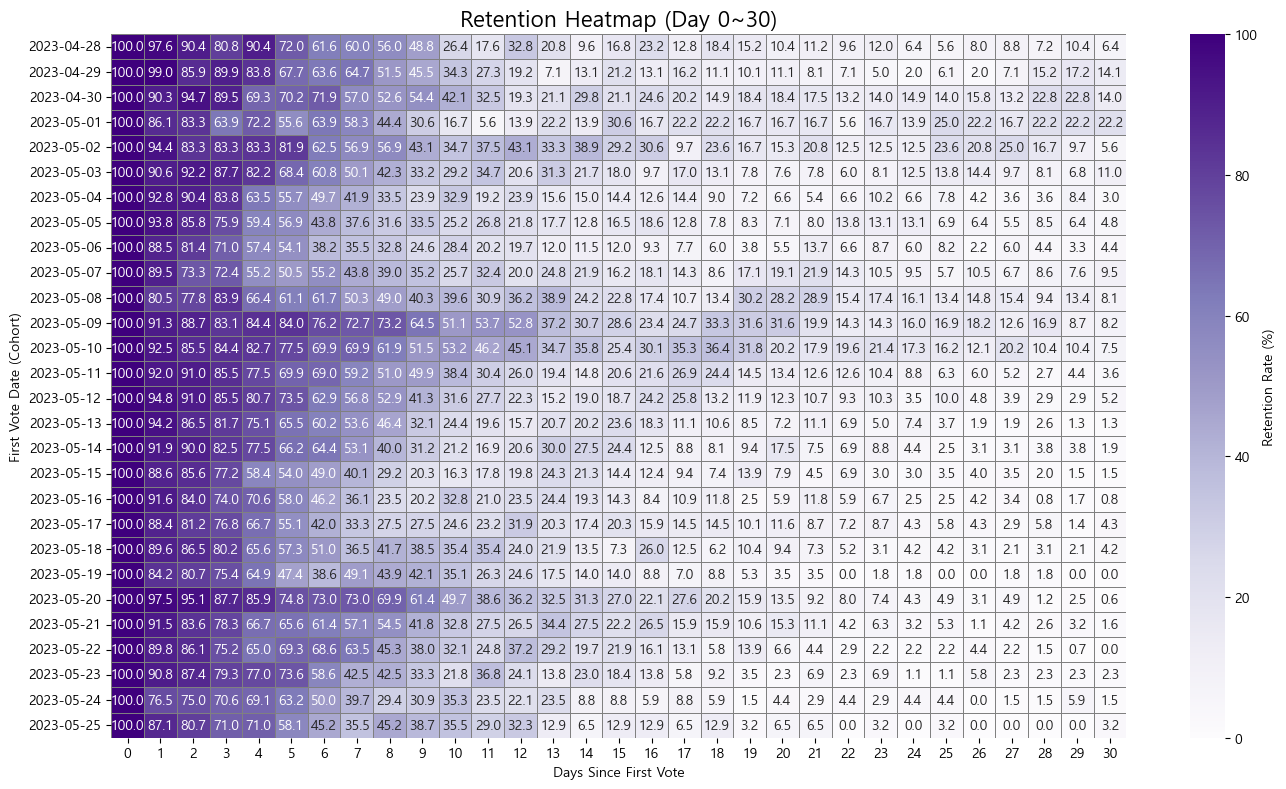

In [48]:
# 히트맵 대상: cohort_size 제외한 day_n 컬럼만 선택
heatmap_data = retention.drop(columns='cohort_size')

# 인덱스를 날짜 문자열로 변환 (시간 제거)
heatmap_data.index = heatmap_data.index.strftime('%Y-%m-%d')

# 히트맵 그리기
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True, fmt=".1f", cmap="Purples", linewidths=0.5, linecolor='gray',
    cbar_kws={'label': 'Retention Rate (%)'}
)

plt.title('Retention Heatmap (Day 0~30)', fontsize=16)
plt.xlabel('Days Since First Vote')
plt.ylabel('First Vote Date (Cohort)')
plt.tight_layout()
plt.show()

# **Cohort 검증**

In [49]:
votes_df = load_data_from_bigquery("SELECT * FROM votes.accounts_userquestionrecord;")
users_df = load_data_from_bigquery("SELECT * FROM votes.accounts_user;")
school_df = load_data_from_bigquery("SELECT * FROM votes.accounts_group")

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [50]:
# 날짜 정제
votes_df["vote_date"] = pd.to_datetime(votes_df["created_at"]).dt.date

# 해당 기간(4/28 ~ 5/25)에 투표한 유저 ID
target_user_ids = votes_df[
    (votes_df["vote_date"] >= pd.to_datetime("2023-04-29").date()) &
    (votes_df["vote_date"] <= pd.to_datetime("2023-05-25").date())
]["user_id"].unique()

# school_id가 존재하는 group만 추출 + id 타입 명시적 변환
school_df_valid = school_df[school_df["school_id"].notnull()].copy()
school_df_valid["id"] = school_df_valid["id"].astype("int64")

# school_id를 유저에게 붙이기 (users → school_df)
users_with_school = users_df.merge(
    school_df_valid[["id", "school_id"]],
    left_on="group_id", right_on="id", how="left"
).drop(columns="id_y").rename(columns={"id_x": "user_id"})

# 해당 유저 중에서 위 기간에 투표한 유저만 필터링
target_users = users_with_school[users_with_school["user_id"].isin(target_user_ids)]

# 투표한 유저가 소속된 학교 ID들 (유니크)
active_school_ids = target_users["school_id"].dropna().unique()
print(" 해당 기간에 투표 발생한 학교 수:", len(active_school_ids))

# 이 학교 ID에 속한 전체 유저 수
final_user_count = users_with_school[
    users_with_school["school_id"].isin(active_school_ids)
]["user_id"].nunique()

print(" 해당 학교에 소속된 유저 수:", final_user_count)

 해당 기간에 투표 발생한 학교 수: 10
 해당 학교에 소속된 유저 수: 5090


In [51]:
# 해당 학교에 속한 유저 ID 목록
target_school_user_ids = users_with_school[
    users_with_school["school_id"].isin(active_school_ids)
]["user_id"].unique()

# 해당 유저 중에서 4/28 ~ 5/25 기간에 투표한 유저 수
voted_users_in_target_schools = votes_df[
    (votes_df["vote_date"] >= pd.to_datetime("2023-04-29").date()) &
    (votes_df["vote_date"] <= pd.to_datetime("2023-05-25").date()) &
    (votes_df["user_id"].isin(target_school_user_ids))
]["user_id"].nunique()

print(" 해당 10개 학교 유저 중 실제 투표한 유저 수:", voted_users_in_target_schools)

 해당 10개 학교 유저 중 실제 투표한 유저 수: 4703


In [52]:
# vote_date 파싱
votes_df["vote_date"] = pd.to_datetime(votes_df["created_at"]).dt.normalize()

# cohort_day (첫 투표일) 생성
cohort_df = votes_df.groupby("user_id")["vote_date"].min().reset_index(name="cohort_day")

# 대상 유저만 필터링 (4703명)
votes_filtered_df = votes_df[votes_df["user_id"].isin(target_user_ids)].copy()
votes_filtered_df = votes_filtered_df.merge(cohort_df, on="user_id", how="left")

# active_day 계산
votes_filtered_df["active_day"] = (votes_filtered_df["vote_date"] - votes_filtered_df["cohort_day"]).dt.days

# 기간 필터 (cohort_day 기준 4/29~5/25 사이)
votes_filtered_df = votes_filtered_df[
    (votes_filtered_df["cohort_day"] >= "2023-04-29") &
    (votes_filtered_df["cohort_day"] <= "2023-05-25") &
    (votes_filtered_df["active_day"] >= 0)
]

# cohort 크기 계산
cohort_size_df = votes_filtered_df.groupby("cohort_day")["user_id"].nunique().reset_index(name="cohort_size")

# active_day별 유지 유저 수
retained_df = votes_filtered_df.groupby(["cohort_day", "active_day"])["user_id"] \
    .nunique().reset_index(name="retained")

# 리텐션율 계산
ret_df = retained_df.merge(cohort_size_df, on="cohort_day")
ret_df["rate"] = ret_df["retained"] / ret_df["cohort_size"]

In [53]:
cohort_df

user_id cohort_day
0      838023 2023-04-29
1      838466 2023-05-02
2      838642 2023-04-28
3      839357 2023-04-29
4      840293 2023-05-03
...       ...        ...
4844  1577440 2023-06-29
4845  1578095 2023-07-11
4846  1579418 2023-07-25
4847  1580578 2023-09-20
4848  1583358 2024-03-19

[4849 rows x 2 columns]

In [54]:
print(cohort_df[cohort_df['cohort_day'] == '2023-04-28'].drop_duplicates(subset='user_id').shape[0])
print(cohort_df[cohort_df['cohort_day'] == '2023-04-29'].drop_duplicates(subset='user_id').shape[0])

print

125
99


<function print>

In [55]:
import numpy as np

len(set(
    np.concatenate([
        cohort_df[cohort_df['cohort_day'] == '2023-04-28'].drop_duplicates(subset='user_id')['user_id'].unique(),
        cohort_df[cohort_df['cohort_day'] == '2023-04-29'].drop_duplicates(subset='user_id')['user_id'].unique()
    ])
))

224

In [56]:
ret_df.drop_duplicates(subset=['cohort_size'])

cohort_day  active_day  retained  cohort_size  rate
0    2023-04-29           0        99           99   1.0
68   2023-04-30           0       114          114   1.0
158  2023-05-01           0        36           36   1.0
218  2023-05-02           0        72           72   1.0
292  2023-05-03           0       383          383   1.0
414  2023-05-04           0       167          167   1.0
480  2023-05-05           0       436          436   1.0
587  2023-05-06           0       183          183   1.0
655  2023-05-07           0       105          105   1.0
717  2023-05-08           0       149          149   1.0
807  2023-05-09           0       231          231   1.0
909  2023-05-10           0       173          173   1.0
1021 2023-05-11           0       365          365   1.0
1115 2023-05-12           0       310          310   1.0
1216 2023-05-13           0       377          377   1.0
1347 2023-05-14           0       160          160   1.0
1419 2023-05-15           0       202          202   1.0
1492 2023-05-16           0       119          119   1.0
1541 2023-05-17           0        69           69   1.0
1606 2023-05-18           0        96           96   1.0
1667 2023-05-19           0        57           57   1.0
1699 2023-05-20           0       163          163   1.0
1777 2023-05-21           0       189          189   1.0
1861 2023-05-22           0       137          137   1.0
1914 2023-05-23           0        87           87   1.0
1962 2023-05-24           0        68           68   1.0
2010 2023-05-25           0        31           31   1.0

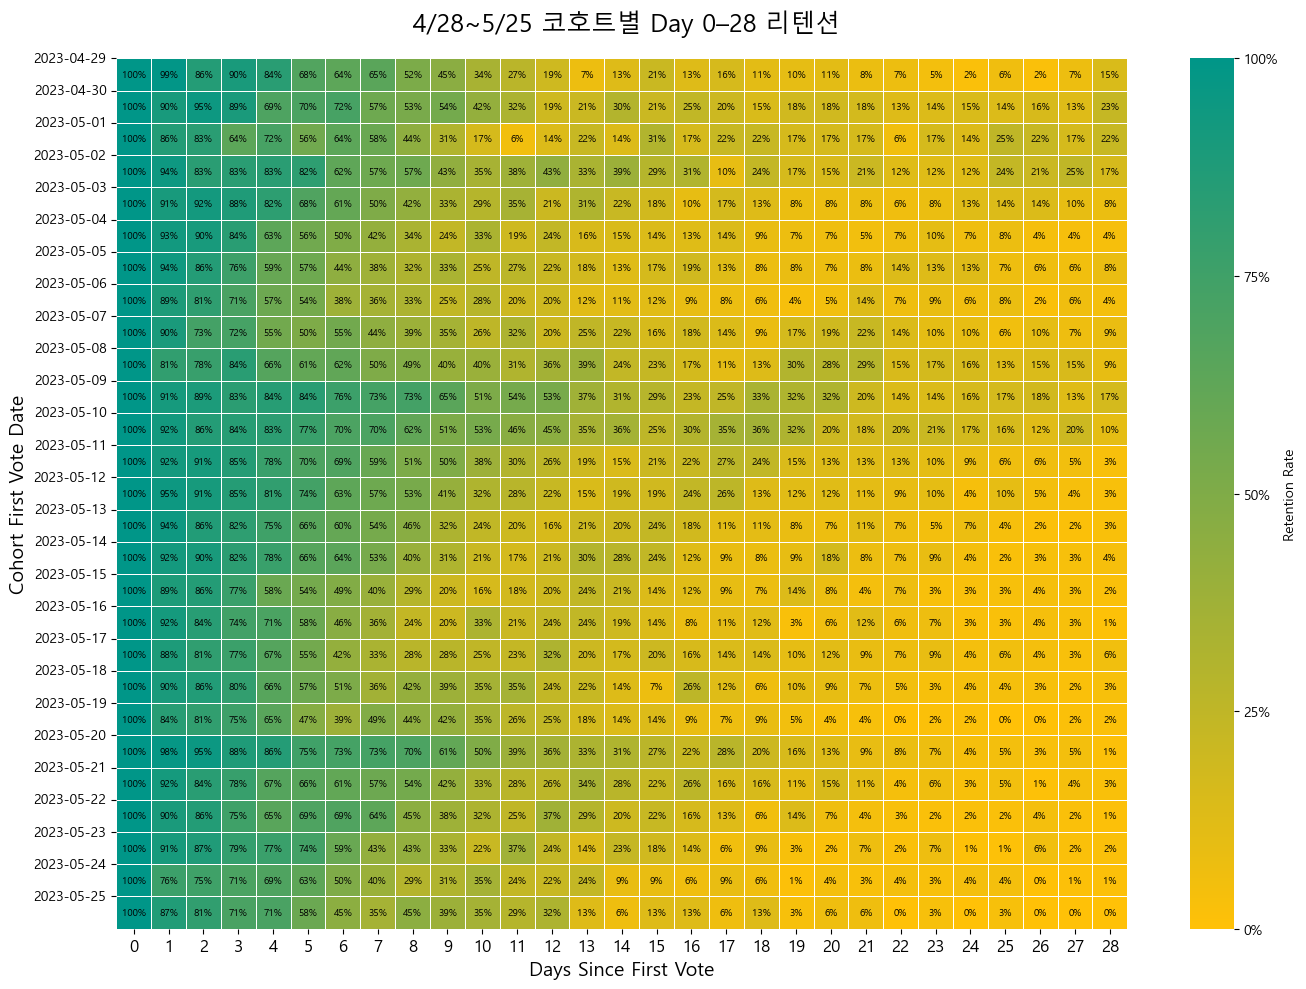

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib import ticker

# 피벗: Day 0~28까지만 시각화
heat_df = ret_df.pivot(index="cohort_day", columns="active_day", values="rate").fillna(0)
heat_25 = heat_df.loc[:, :28]

# 컬러맵 
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "team_palette", ["#ffc107", "#009688"], N=256
)

# 히트맵 생성
plt.figure(figsize=(14, 10))
sns.heatmap(
    heat_25,
    cmap=custom_cmap,
    annot=heat_25.applymap(lambda x: f"{x:.0%}"),
    fmt="",
    annot_kws={"size": 7, "color": "black"},
    linewidths=0.5,
    linecolor="white",
    vmin=0, vmax=1,
    cbar_kws={
        "label": "Retention Rate",
        "format": ticker.PercentFormatter(xmax=1, decimals=0),
        "ticks": [0, 0.25, 0.5, 0.75, 1.0]
    }
)

# 축 및 제목 설정
plt.xticks(rotation=0, fontsize=12)
plt.yticks(ticks=range(len(heat_25.index)), labels=heat_25.index.strftime('%Y-%m-%d'), rotation=0, fontsize=10)
plt.title(" 4/28~5/25 코호트별 Day 0–28 리텐션", fontsize=18, pad=20)
plt.xlabel("Days Since First Vote", fontsize=14)
plt.ylabel("Cohort First Vote Date", fontsize=14)

plt.tight_layout()
plt.show()

In [58]:
heat_25

active_day   0         1         2         3         4         5         6   \
cohort_day                                                                    
2023-04-29  1.0  0.989899  0.858586  0.898990  0.838384  0.676768  0.636364   
2023-04-30  1.0  0.903509  0.947368  0.894737  0.692982  0.701754  0.719298   
2023-05-01  1.0  0.861111  0.833333  0.638889  0.722222  0.555556  0.638889   
2023-05-02  1.0  0.944444  0.833333  0.833333  0.833333  0.819444  0.625000   
2023-05-03  1.0  0.906005  0.921671  0.877285  0.822454  0.684073  0.608355   
2023-05-04  1.0  0.928144  0.904192  0.838323  0.634731  0.556886  0.497006   
2023-05-05  1.0  0.938073  0.857798  0.759174  0.594037  0.568807  0.438073   
2023-05-06  1.0  0.885246  0.814208  0.710383  0.573770  0.540984  0.382514   
2023-05-07  1.0  0.895238  0.733333  0.723810  0.552381  0.504762  0.552381   
2023-05-08  1.0  0.805369  0.778523  0.838926  0.664430  0.610738  0.617450   
2023-05-09  1.0  0.913420  0.887446  0.831169  0.844156  0.839827  0.761905   
2023-05-10  1.0  0.924855  0.855491  0.843931  0.826590  0.774566  0.699422   
2023-05-11  1.0  0.920548  0.909589  0.854795  0.775342  0.698630  0.690411   
2023-05-12  1.0  0.948387  0.909677  0.854839  0.806452  0.735484  0.629032   
2023-05-13  1.0  0.941645  0.864721  0.816976  0.750663  0.655172  0.602122   
2023-05-14  1.0  0.918750  0.900000  0.825000  0.775000  0.662500  0.643750   
2023-05-15  1.0  0.886139  0.856436  0.772277  0.584158  0.539604  0.490099   
2023-05-16  1.0  0.915966  0.840336  0.739496  0.705882  0.579832  0.462185   
2023-05-17  1.0  0.884058  0.811594  0.768116  0.666667  0.550725  0.420290   
2023-05-18  1.0  0.895833  0.864583  0.802083  0.656250  0.572917  0.510417   
2023-05-19  1.0  0.842105  0.807018  0.754386  0.649123  0.473684  0.385965   
2023-05-20  1.0  0.975460  0.950920  0.877301  0.858896  0.748466  0.730061   
2023-05-21  1.0  0.915344  0.835979  0.783069  0.666667  0.656085  0.613757   
2023-05-22  1.0  0.897810  0.861314  0.751825  0.649635  0.693431  0.686131   
2023-05-23  1.0  0.908046  0.873563  0.793103  0.770115  0.735632  0.586207   
2023-05-24  1.0  0.764706  0.750000  0.705882  0.691176  0.632353  0.500000   
2023-05-25  1.0  0.870968  0.806452  0.709677  0.709677  0.580645  0.451613   

active_day        7         8         9   ...        19        20        21  \
cohort_day                                ...                                 
2023-04-29  0.646465  0.515152  0.454545  ...  0.101010  0.111111  0.080808   
2023-04-30  0.570175  0.526316  0.543860  ...  0.184211  0.184211  0.175439   
2023-05-01  0.583333  0.444444  0.305556  ...  0.166667  0.166667  0.166667   
2023-05-02  0.569444  0.569444  0.430556  ...  0.166667  0.152778  0.208333   
2023-05-03  0.501305  0.422977  0.331593  ...  0.078329  0.075718  0.078329   
2023-05-04  0.419162  0.335329  0.239521  ...  0.071856  0.065868  0.053892   
2023-05-05  0.376147  0.316514  0.334862  ...  0.082569  0.071101  0.080275   
2023-05-06  0.355191  0.327869  0.245902  ...  0.038251  0.054645  0.136612   
2023-05-07  0.438095  0.390476  0.352381  ...  0.171429  0.190476  0.219048   
2023-05-08  0.503356  0.489933  0.402685  ...  0.302013  0.281879  0.288591   
2023-05-09  0.727273  0.731602  0.645022  ...  0.316017  0.316017  0.199134   
2023-05-10  0.699422  0.618497  0.514451  ...  0.317919  0.202312  0.179191   
2023-05-11  0.591781  0.509589  0.498630  ...  0.145205  0.134247  0.126027   
2023-05-12  0.567742  0.529032  0.412903  ...  0.119355  0.122581  0.106452   
2023-05-13  0.535809  0.464191  0.320955  ...  0.084881  0.071618  0.111406   
2023-05-14  0.531250  0.400000  0.312500  ...  0.093750  0.175000  0.075000   
2023-05-15  0.400990  0.292079  0.202970  ...  0.138614  0.079208  0.044554   
2023-05-16  0.361345  0.235294  0.201681  ...  0.025210  0.058824  0.117647   
2023-05-17  0.333333  0.275362  0.275362  ...  0.101449  0.115942  0.086957   
2023-05-18  0.364583  0.416667  0.385417  ...  0.

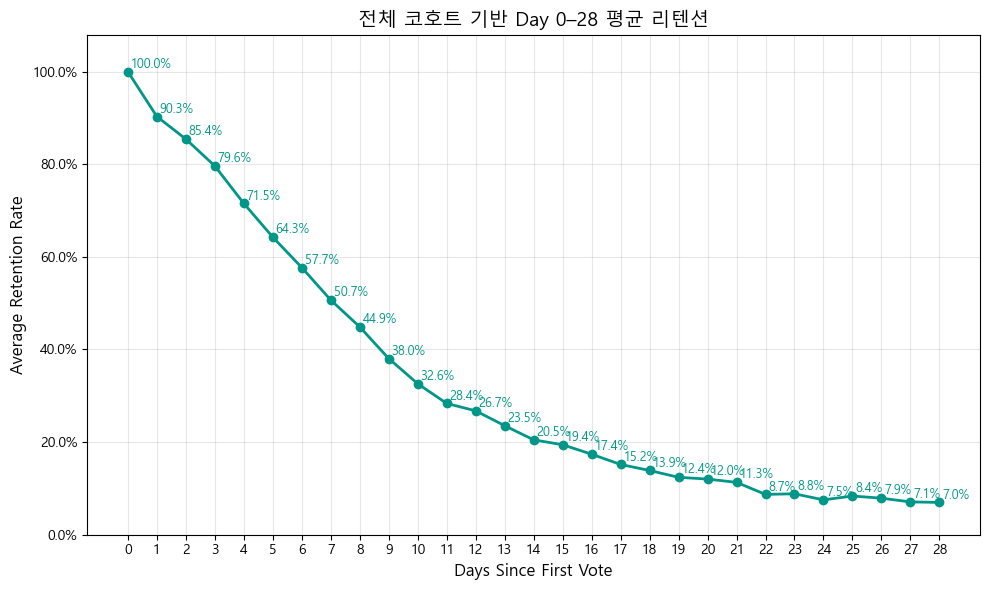

In [59]:
# 수치 추가 후 조절

from matplotlib import ticker

# 평균 리텐션 계산 (Day 0~28)
avg_retention = (
    ret_df[ret_df["active_day"] <= 28]
    .groupby("active_day")["rate"]
    .mean()
    .reset_index()
)

# 라인 그래프 
plt.figure(figsize=(10, 6))
plt.plot(
    avg_retention["active_day"],
    avg_retention["rate"],
    marker="o",
    color="#009688",  #
    linewidth=2,
    label="평균 리텐션율"
)

# 각 점 위에 수치 표시
# 수치 표시를 좀 더 보기 좋게 띄워서 추가
for x, y in zip(avg_retention["active_day"], avg_retention["rate"]):
    plt.text(x + 0.1, y + 0.03, f"{y:.1%}", ha="left", va="top", fontsize=9, color="#009688")



# 레이블/그리드/포맷 설정
plt.xticks(range(0, 29))
plt.xlabel("Days Since First Vote", fontsize=12)
plt.ylabel("Average Retention Rate", fontsize=12)
plt.title("전체 코호트 기반 Day 0–28 평균 리텐션", fontsize=14)
plt.grid(alpha=0.3)
plt.ylim(0, 1.08)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.tight_layout()
plt.show()

In [60]:
avg_retention

active_day      rate
0            0  1.000000
1            1  0.903003
2            2  0.854351
3            3  0.796214
4            4  0.715377
5            5  0.642568
6            6  0.576989
7            7  0.506709
8            8  0.448789
9            9  0.380471
10          10  0.326051
11          11  0.283568
12          12  0.267498
13          13  0.235493
14          14  0.204880
15          15  0.194316
16          16  0.173833
17          17  0.151706
18          18  0.138680
19          19  0.123987
20          20  0.120176
21          21  0.113044
22          22  0.087077
23          23  0.088406
24          24  0.075236
25          25  0.083559
26          26  0.078884
27          27  0.070874
28          28  0.069727

# **\[파생변수\] 콘텐츠 유형에 따른 재투표율**

In [61]:
userquestionrecord_df = load_data_from_bigquery("SELECT * FROM votes.accounts_userquestionrecord;")
polls_questionpiece_df = load_data_from_bigquery("SELECT * FROM votes.polls_questionpiece;")
polls_question_add_category_df = load_data_from_bigquery("SELECT * FROM votes.polls_question_add_category;")

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [62]:
display(userquestionrecord_df)
display(polls_questionpiece_df)
display(polls_question_add_category_df)

id status          created_at  chosen_user_id  question_id  \
0           945319      I 2023-04-29 13:22:05          849995          132   
1           978922      I 2023-04-29 14:49:06          849922          180   
2          1095692      I 2023-04-30 03:29:48          850031          132   
3          1167181      I 2023-04-30 07:43:10          856172          116   
4          1171173      I 2023-04-30 07:58:36          855039          132   
...            ...    ...                 ...             ...          ...   
1217553  161153946      I 2023-09-24 07:29:33         1469364         2117   
1217554  161365056      I 2023-10-19 13:40:14         1417450          151   
1217555  161519729      I 2023-12-02 02:12:09         1014480         1594   
1217556  161521676      I 2023-12-02 16:43:05         1167481         3546   
1217557  161542253      I 2023-12-10 14:32:37         1196405         2924   

         user_id  question_piece_id  has_read answer_status  \
0         851717            1213085         1             P   
1         849450            1235436         1             N   
2         850229            1395859         1             N   
3         857422            1509130         1             N   
4         855117            1511169         1             N   
...          ...                ...       ...           ...   
1217553  1521099          207529811         1             N   
1217554  1426631          205058859         1             N   
1217555  1208878          208157659         1             N   
1217556   953390          195433327         1             N   
1217557  1213287          208176263         1             N   

          answer_updated_at  report_count  opened_times  
0       2023-05-06 10:31:30             0             3  
1       2023-04-29 14:49:06             0             3  
2       2023-04-30 03:29:48             0             3  
3       2023-04-30 07:43:10             0             3  
4       2023-04-30 07:58:36             0             3  
...                     ...           ...           ...  
1217553 2023-09-24 07:29:33             0             2  
1217554 2023-10-19 13:40:14             0             2  
1217555 2023-12-02 02:12:09             0             2  
1217556 2023-12-02 16:43:05             0             2  
1217557 2023-12-10 14:32:37             0             2  

[1217558 rows x 12 columns]

id  is_voted          created_at  question_id  is_skipped
0           998459         1 2023-04-28 12:27:22          244           0
1           998461         1 2023-04-28 12:27:22          101           0
2           998588         1 2023-04-28 12:28:07          237           0
3           998590         1 2023-04-28 12:28:07          184           0
4           998591         1 2023-04-28 12:28:07          157           0
...            ...       ...                 ...          ...         ...
1265471  208385211         0 2024-05-07 11:29:08         1970           0
1265472  208385213         0 2024-05-07 11:29:08          941           0
1265473  208385214         0 2024-05-07 11:29:08         3306           0
1265474  208385225         0 2024-05-07 11:32:30         4534           0
1265475  208385226         0 2024-05-07 11:32:30          960           0

[1265476 rows x 5 columns]

id                           question_text          created_at  \
0       99                      가장 신비한 매력이 있는 사람은? 2023-03-31 15:22:53   
1      100            "이 사람으로 한 번 살아보고 싶다" 하는 사람은? 2023-03-31 15:22:53   
2      101                               미래의 틱톡커는? 2023-03-31 15:22:54   
3      102                         여기서 제일 특이한 친구는? 2023-03-31 15:22:54   
4      103                         가장 지켜주고 싶은 사람은? 2023-03-31 15:22:55   
...    ...                                     ...                 ...   
5020  5129                         나에게 가장 중요한 사람은? 2023-06-06 06:15:52   
5021  5130                    오목을 제일 잘 할 것 같은 사람은? 2023-06-06 06:15:52   
5022  5131                가방에서 쓰레기가 안 나올 것 같은 사람은? 2023-06-06 06:15:52   
5023  5132  아무리 많은 숙제도 30분만에 다 끝내버릴 수 있을 것 같은 친구는? 2023-06-06 06:15:52   
5024  5133                  러브레터를 가장 잘 쓸 것 같은 사람은? 2023-06-06 06:15:52   

            category  
0       [연애, 성격, 감성]  
1     [심리, 상상, 인간관계]  
2      [미디어, 미래, 상상]  
3     [성격, 관찰, 인간관계]  
4     [심리, 일상, 인간관계]  
...              ...  
5020  [심리, 일상, 인간관계]  
5021    [일상, 지식, 관찰]  
5022    [일상, 성격, 관찰]  
5023    [일상, 성격, 관찰]  
5024    [연애, 감성, 대화]  

[5025 rows x 4 columns]

In [63]:
# 중복제거한 polls_questionpiece를 통한 데이터 병합
temp = pd.merge(
        polls_questionpiece_df.drop(labels=['created_at'], axis=1),
        polls_question_add_category_df.drop(labels=['created_at'], axis=1),
        how='left',
        left_on='question_id',
        right_on='id'
    ).drop(labels=['id_y'], axis=1)

# 데이터 확인
display(temp)

# 데이터 총 병합
merged = pd.merge(
    userquestionrecord_df,
    temp,
    how='left',
    left_on='question_piece_id',
    right_on='id_x'
)

# 병합 데이터 확인
display(merged.dropna())

id_x  is_voted  question_id  is_skipped  \
0           998459         1          244           0   
1           998461         1          101           0   
2           998588         1          237           0   
3           998590         1          184           0   
4           998591         1          157           0   
...            ...       ...          ...         ...   
1265471  208385211         0         1970           0   
1265472  208385213         0          941           0   
1265473  208385214         0         3306           0   
1265474  208385225         0         4534           0   
1265475  208385226         0          960           0   

                         question_text         category  
0                대학교에서 학생회장할 것 같은 사람은?   [일상, 성격, 인간관계]  
1                            미래의 틱톡커는?    [미디어, 미래, 상상]  
2        이별 후 자기가 먼저 화해메시지 보낼 것 같은 사람?   [연애, 심리, 인간관계]  
3                    랩을 제일 잘할것 같은 사람은?   [미디어, 상상, 스타일]  
4               나에게 항상 응원과 용기를 주는 사람은?   [심리, 감성, 인간관계]  
...                                ...              ...  
1265471                주말에 같이 놀고 싶은 사람   [연애, 일상, 인간관계]  
1265472                    사귀고 싶은 사람은?   [연애, 상상, 인간관계]  
1265473            이성에게 철벽 칠 것 같은 친구는?   [연애, 성격, 인간관계]  
1265474         시험 0점 맞아도 웃고있을 것 같은 사람     [심리, 일상, 성격]  
1265475               가장 인싸일 것 같은 친구는?  [일상, 스타일, 인간관계]  

[1265476 rows x 6 columns]

id status          created_at  chosen_user_id  question_id_x  \
0           945319      I 2023-04-29 13:22:05          849995            132   
1           978922      I 2023-04-29 14:49:06          849922            180   
2          1095692      I 2023-04-30 03:29:48          850031            132   
3          1167181      I 2023-04-30 07:43:10          856172            116   
4          1171173      I 2023-04-30 07:58:36          855039            132   
...            ...    ...                 ...             ...            ...   
1217553  161153946      I 2023-09-24 07:29:33         1469364           2117   
1217554  161365056      I 2023-10-19 13:40:14         1417450            151   
1217555  161519729      I 2023-12-02 02:12:09         1014480           1594   
1217556  161521676      I 2023-12-02 16:43:05         1167481           3546   
1217557  161542253      I 2023-12-10 14:32:37         1196405           2924   

         user_id  question_piece_id  has_read answer_status  \
0         851717            1213085         1             P   
1         849450            1235436         1             N   
2         850229            1395859         1             N   
3         857422            1509130         1             N   
4         855117            1511169         1             N   
...          ...                ...       ...           ...   
1217553  1521099          207529811         1             N   
1217554  1426631          205058859         1             N   
1217555  1208878          208157659         1             N   
1217556   953390          195433327         1             N   
1217557  1213287          208176263         1             N   

          answer_updated_at  report_count  opened_times       id_x  is_voted  \
0       2023-05-06 10:31:30             0             3    1213085         1   
1       2023-04-29 14:49:06             0             3    1235436         1   
2       2023-04-30 03:29:48             0             3    1395859         1   
3       2023-04-30 07:43:10             0             3    1509130         1   
4       2023-04-30 07:58:36             0             3    1511169         1   
...                     ...           ...           ...        ...       ...   
1217553 2023-09-24 07:29:33             0             2  207529811         1   
1217554 2023-10-19 13:40:14             0             2  205058859         1   
1217555 2023-12-02 02:12:09             0             2  208157659         1   
1217556 2023-12-02 16:43:05             0             2  195433327         1   
1217557 2023-12-10 14:32:37             0             2  208176263         1   

         question_id_y  is_skipped                 question_text  \
0                  132           0            내 이상형과 가장 가까운 사람은?   
1                  180           0                 볼수록 매력있는 사람은?   
2                  132           0            내 이상형과 가장 가까운 사람은?   
3                  116           0              대학가서 용될것 같은 사람은?   
4                  132           0            내 이상형과 가장 가까운 사람은?   
...                ...         ...                           ...   
1217553           2117           0            이별 후 후폭풍 올 것 같은 사람   
1217554            151           0            모든 스포츠를 다 잘하는 사람은?   
1217555           1594           0  이 중 가장 인생을 재미있게 사는 것 같은 친구는?   
1217556           3546           0     카페에서 사진 백만장 찍을 것 같은 사람은??   
1217557           2924           0      기말고사를 제일 열심히 준비할 것 같은 친구   

                 category  
0          [연애, 심리, 인간관계]  
1          [성격, 관찰, 인간관계]  
2          [연애, 심리, 인간관계]  
3          [성격, 미래, 인간관계]  
4          [연애, 심리, 인간관계]  
...                   ...  
1217553      [연애, 감성, 심리]  
1217554      [일상, 운동, 관찰]  
1217555  [심리, 일상, 라이프스타일]  
1217556    [일상, 스타일, 미디어]  
1217557      [성격, 지식, 미래]  

[1217558 rows x 18 columns]

In [64]:
# question_text 중 vote 삭제
merged = merged[merged['question_text'] != 'vote']

# 데이터 확인
merged

id status          created_at  chosen_user_id  question_id_x  \
0           945319      I 2023-04-29 13:22:05          849995            132   
1           978922      I 2023-04-29 14:49:06          849922            180   
2          1095692      I 2023-04-30 03:29:48          850031            132   
3          1167181      I 2023-04-30 07:43:10          856172            116   
4          1171173      I 2023-04-30 07:58:36          855039            132   
...            ...    ...                 ...             ...            ...   
1217553  161153946      I 2023-09-24 07:29:33         1469364           2117   
1217554  161365056      I 2023-10-19 13:40:14         1417450            151   
1217555  161519729      I 2023-12-02 02:12:09         1014480           1594   
1217556  161521676      I 2023-12-02 16:43:05         1167481           3546   
1217557  161542253      I 2023-12-10 14:32:37         1196405           2924   

         user_id  question_piece_id  has_read answer_status  \
0         851717            1213085         1             P   
1         849450            1235436         1             N   
2         850229            1395859         1             N   
3         857422            1509130         1             N   
4         855117            1511169         1             N   
...          ...                ...       ...           ...   
1217553  1521099          207529811         1             N   
1217554  1426631          205058859         1             N   
1217555  1208878          208157659         1             N   
1217556   953390          195433327         1             N   
1217557  1213287          208176263         1             N   

          answer_updated_at  report_count  opened_times       id_x  is_voted  \
0       2023-05-06 10:31:30             0             3    1213085         1   
1       2023-04-29 14:49:06             0             3    1235436         1   
2       2023-04-30 03:29:48             0             3    1395859         1   
3       2023-04-30 07:43:10             0             3    1509130         1   
4       2023-04-30 07:58:36             0             3    1511169         1   
...                     ...           ...           ...        ...       ...   
1217553 2023-09-24 07:29:33             0             2  207529811         1   
1217554 2023-10-19 13:40:14             0             2  205058859         1   
1217555 2023-12-02 02:12:09             0             2  208157659         1   
1217556 2023-12-02 16:43:05             0             2  195433327         1   
1217557 2023-12-10 14:32:37             0             2  208176263         1   

         question_id_y  is_skipped                 question_text  \
0                  132           0            내 이상형과 가장 가까운 사람은?   
1                  180           0                 볼수록 매력있는 사람은?   
2                  132           0            내 이상형과 가장 가까운 사람은?   
3                  116           0              대학가서 용될것 같은 사람은?   
4                  132           0            내 이상형과 가장 가까운 사람은?   
...                ...         ...                           ...   
1217553           2117           0            이별 후 후폭풍 올 것 같은 사람   
1217554            151           0            모든 스포츠를 다 잘하는 사람은?   
1217555           1594           0  이 중 가장 인생을 재미있게 사는 것 같은 친구는?   
1217556           3546           0     카페에서 사진 백만장 찍을 것 같은 사람은??   
1217557           2924           0      기말고사를 제일 열심히 준비할 것 같은 친구   

                 category  
0          [연애, 심리, 인간관계]  
1          [성격, 관찰, 인간관계]  
2          [연애, 심리, 인간관계]  
3          [성격, 미래, 인간관계]  
4          [연애, 심리, 인간관계]  
...                   ...  
1217553      [연애, 감성, 심리]  
1217554      [일상, 운동, 관찰]  
1217555  [심리, 일상, 라이프스타일]  
1217556    [일상, 스타일, 미디어]  
1217557      [성격, 지식, 미래]  

[1207863 rows x 18 columns]

In [65]:
# 희진 : 중심 극한 정리를 활용하기 위해 표분 수가 30명 이상인 기간은 5/1 ~ 5/25
# 기간을 5/1부터 5/25일까지 필터링
# temp : (merged['created_at'] >= '2023-05-01') & 
merged_filtered = merged[(merged['created_at'] <= '2023-05-26')]

# 데이터 확인
merged_filtered

id status          created_at  chosen_user_id  question_id_x  \
0           945319      I 2023-04-29 13:22:05          849995            132   
1           978922      I 2023-04-29 14:49:06          849922            180   
2          1095692      I 2023-04-30 03:29:48          850031            132   
3          1167181      I 2023-04-30 07:43:10          856172            116   
4          1171173      I 2023-04-30 07:58:36          855039            132   
...            ...    ...                 ...             ...            ...   
1216491  112539200      I 2023-05-25 23:34:10         1510618            357   
1216492  112543488      I 2023-05-25 23:35:13          857422           1394   
1216493  112544524      I 2023-05-25 23:35:28          865904           1577   
1216494  112553273      I 2023-05-25 23:37:37         1433214            563   
1216495  112553370      I 2023-05-25 23:37:38         1070178           1242   

         user_id  question_piece_id  has_read answer_status  \
0         851717            1213085         1             P   
1         849450            1235436         1             N   
2         850229            1395859         1             N   
3         857422            1509130         1             N   
4         855117            1511169         1             N   
...          ...                ...       ...           ...   
1216491  1455086          144112779         1             N   
1216492   856172          139480741         1             N   
1216493   856172          139480743         1             N   
1216494  1410690          143925241         1             N   
1216495  1102028          133063460         1             N   

          answer_updated_at  report_count  opened_times       id_x  is_voted  \
0       2023-05-06 10:31:30             0             3    1213085         1   
1       2023-04-29 14:49:06             0             3    1235436         1   
2       2023-04-30 03:29:48             0             3    1395859         1   
3       2023-04-30 07:43:10             0             3    1509130         1   
4       2023-04-30 07:58:36             0             3    1511169         1   
...                     ...           ...           ...        ...       ...   
1216491 2023-05-25 23:34:10             0             2  144112779         1   
1216492 2023-05-25 23:35:13             0             2  139480741         1   
1216493 2023-05-25 23:35:28             0             2  139480743         1   
1216494 2023-05-25 23:37:37             0             2  143925241         1   
1216495 2023-05-25 23:37:38             0             2  133063460         1   

         question_id_y  is_skipped             question_text        category  
0                  132           0        내 이상형과 가장 가까운 사람은?  [연애, 심리, 인간관계]  
1                  180           0             볼수록 매력있는 사람은?  [성격, 관찰, 인간관계]  
2                  132           0        내 이상형과 가장 가까운 사람은?  [연애, 심리, 인간관계]  
3                  116           0          대학가서 용될것 같은 사람은?  [성격, 미래, 인간관계]  
4                  132           0        내 이상형과 가장 가까운 사람은?  [연애, 심리, 인간관계]  
...                ...         ...                       ...             ...  
1216491            357           0          옷빨을 제일 잘 받는 사람은?   [일상, 스타일, 관찰]  
1216492           1394           0  겨울에 눈싸움하면 재미있을 것 같은 사람은?    [상상, 일상, 감성]  
1216493           1577           0   인생에서 제일 잘 뒀다고 생각하는 친구는?  [심리, 일상, 인간관계]  
1216494            563           0  모둠활동할 때 버스 태워줄 것 같은 사람은?  [일상, 성격, 인간관계]  
1216495           1242           0    체육대회 때 고백 받을 것 같은 사람은?    [연애, 일상, 미래]  

[1007999 rows x 18 columns]

In [66]:
# created_at 컬럼을 dt.date로 변경
merged_filtered['created_at'] = merged_filtered['created_at'].dt.date

# 데이터 확인
merged_filtered

C:\Users\lento\AppData\Local\Temp\ipykernel_7308\3209890677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_filtered['created_at'] = merged_filtered['created_at'].dt.date


id status  created_at  chosen_user_id  question_id_x  user_id  \
0           945319      I  2023-04-29          849995            132   851717   
1           978922      I  2023-04-29          849922            180   849450   
2          1095692      I  2023-04-30          850031            132   850229   
3          1167181      I  2023-04-30          856172            116   857422   
4          1171173      I  2023-04-30          855039            132   855117   
...            ...    ...         ...             ...            ...      ...   
1216491  112539200      I  2023-05-25         1510618            357  1455086   
1216492  112543488      I  2023-05-25          857422           1394   856172   
1216493  112544524      I  2023-05-25          865904           1577   856172   
1216494  112553273      I  2023-05-25         1433214            563  1410690   
1216495  112553370      I  2023-05-25         1070178           1242  1102028   

         question_piece_id  has_read answer_status   answer_updated_at  \
0                  1213085         1             P 2023-05-06 10:31:30   
1                  1235436         1             N 2023-04-29 14:49:06   
2                  1395859         1             N 2023-04-30 03:29:48   
3                  1509130         1             N 2023-04-30 07:43:10   
4                  1511169         1             N 2023-04-30 07:58:36   
...                    ...       ...           ...                 ...   
1216491          144112779         1             N 2023-05-25 23:34:10   
1216492          139480741         1             N 2023-05-25 23:35:13   
1216493          139480743         1             N 2023-05-25 23:35:28   
1216494          143925241         1             N 2023-05-25 23:37:37   
1216495          133063460         1             N 2023-05-25 23:37:38   

         report_count  opened_times       id_x  is_voted  question_id_y  \
0                   0             3    1213085         1            132   
1                   0             3    1235436         1            180   
2                   0             3    1395859         1            132   
3                   0             3    1509130         1            116   
4                   0             3    1511169         1            132   
...               ...           ...        ...       ...            ...   
1216491             0             2  144112779         1            357   
1216492             0             2  139480741         1           1394   
1216493             0             2  139480743         1           1577   
1216494             0             2  143925241         1            563   
1216495             0             2  133063460         1           1242   

         is_skipped             question_text        category  
0                 0        내 이상형과 가장 가까운 사람은?  [연애, 심리, 인간관계]  
1                 0             볼수록 매력있는 사람은?  [성격, 관찰, 인간관계]  
2                 0        내 이상형과 가장 가까운 사람은?  [연애, 심리, 인간관계]  
3                 0          대학가서 용될것 같은 사람은?  [성격, 미래, 인간관계]  
4                 0        내 이상형과 가장 가까운 사람은?  [연애, 심리, 인간관계]  
...             ...                       ...             ...  
1216491           0          옷빨을 제일 잘 받는 사람은?   [일상, 스타일, 관찰]  
1216492           0  겨울에 눈싸움하면 재미있을 것 같은 사람은?    [상상, 일상, 감성]  
1216493           0   인생에서 제일 잘 뒀다고 생각하는 친구는?  [심리, 일상, 인간관계]  
1216494           0  모둠활동할 때 버스 태워줄 것 같은 사람은?  [일상, 성격, 인간관계]  
1216495           0    체육대회 때 고백 받을 것 같은 사람은?    [연애, 일상, 미래]  

[1007999 rows x 18 columns]

In [67]:
# 중복값 확인
# drop_duplicates를 하였으나 rows의 숫자가 바뀌지 않음을 확인
merged_filtered.drop_duplicates(subset=['user_id', 'question_piece_id'], keep='first')

id status  created_at  chosen_user_id  question_id_x  user_id  \
0           945319      I  2023-04-29          849995            132   851717   
1           978922      I  2023-04-29          849922            180   849450   
2          1095692      I  2023-04-30          850031            132   850229   
3          1167181      I  2023-04-30          856172            116   857422   
4          1171173      I  2023-04-30          855039            132   855117   
...            ...    ...         ...             ...            ...      ...   
1216491  112539200      I  2023-05-25         1510618            357  1455086   
1216492  112543488      I  2023-05-25          857422           1394   856172   
1216493  112544524      I  2023-05-25          865904           1577   856172   
1216494  112553273      I  2023-05-25         1433214            563  1410690   
1216495  112553370      I  2023-05-25         1070178           1242  1102028   

         question_piece_id  has_read answer_status   answer_updated_at  \
0                  1213085         1             P 2023-05-06 10:31:30   
1                  1235436         1             N 2023-04-29 14:49:06   
2                  1395859         1             N 2023-04-30 03:29:48   
3                  1509130         1             N 2023-04-30 07:43:10   
4                  1511169         1             N 2023-04-30 07:58:36   
...                    ...       ...           ...                 ...   
1216491          144112779         1             N 2023-05-25 23:34:10   
1216492          139480741         1             N 2023-05-25 23:35:13   
1216493          139480743         1             N 2023-05-25 23:35:28   
1216494          143925241         1             N 2023-05-25 23:37:37   
1216495          133063460         1             N 2023-05-25 23:37:38   

         report_count  opened_times       id_x  is_voted  question_id_y  \
0                   0             3    1213085         1            132   
1                   0             3    1235436         1            180   
2                   0             3    1395859         1            132   
3                   0             3    1509130         1            116   
4                   0             3    1511169         1            132   
...               ...           ...        ...       ...            ...   
1216491             0             2  144112779         1            357   
1216492             0             2  139480741         1           1394   
1216493             0             2  139480743         1           1577   
1216494             0             2  143925241         1            563   
1216495             0             2  133063460         1           1242   

         is_skipped             question_text        category  
0                 0        내 이상형과 가장 가까운 사람은?  [연애, 심리, 인간관계]  
1                 0             볼수록 매력있는 사람은?  [성격, 관찰, 인간관계]  
2                 0        내 이상형과 가장 가까운 사람은?  [연애, 심리, 인간관계]  
3                 0          대학가서 용될것 같은 사람은?  [성격, 미래, 인간관계]  
4                 0        내 이상형과 가장 가까운 사람은?  [연애, 심리, 인간관계]  
...             ...                       ...             ...  
1216491           0          옷빨을 제일 잘 받는 사람은?   [일상, 스타일, 관찰]  
1216492           0  겨울에 눈싸움하면 재미있을 것 같은 사람은?    [상상, 일상, 감성]  
1216493           0   인생에서 제일 잘 뒀다고 생각하는 친구는?  [심리, 일상, 인간관계]  
1216494           0  모둠활동할 때 버스 태워줄 것 같은 사람은?  [일상, 성격, 인간관계]  
1216495           0    체육대회 때 고백 받을 것 같은 사람은?    [연애, 일상, 미래]  

[1007999 rows x 18 columns]

In [68]:
# 해당 유저가 첫 투표가 어떻게 되는지에 대한 내용 확인
merged_filtered.groupby(['user_id'])[['created_at', 'question_piece_id', 'category']].agg('first').reset_index().to_csv('first_question_category', index=False)

In [69]:
# user_id 기준으로 category 컬럼 groupby 후 one-hot encoding 까지
# 먼저 explode
merged_filtered = merged_filtered.explode(column='category')
display(merged_filtered)

# one-hot encoding
one_hot = pd.get_dummies(merged_filtered['category'])
display(one_hot)

# user_id와 one-hot을 concat
merged_ohe = pd.concat([merged_filtered['user_id'], one_hot], axis=1)
display(merged_ohe)

# user_id 기준 groupby + 합산
result = merged_ohe.groupby('user_id').sum().reset_index()
display(result)

# point 키워드를 통한 내용 확인
point_keywords = ['user_id', '연애', '인간관계', '일상', '성격', '감성', '대화', '상상', '스타일', '미디어', '운동', '지식', '라이프스타일', '심리', '관찰', '미래']
result = result[point_keywords]
display(result)

id status  created_at  chosen_user_id  question_id_x  user_id  \
0           945319      I  2023-04-29          849995            132   851717   
0           945319      I  2023-04-29          849995            132   851717   
0           945319      I  2023-04-29          849995            132   851717   
1           978922      I  2023-04-29          849922            180   849450   
1           978922      I  2023-04-29          849922            180   849450   
...            ...    ...         ...             ...            ...      ...   
1216494  112553273      I  2023-05-25         1433214            563  1410690   
1216494  112553273      I  2023-05-25         1433214            563  1410690   
1216495  112553370      I  2023-05-25         1070178           1242  1102028   
1216495  112553370      I  2023-05-25         1070178           1242  1102028   
1216495  112553370      I  2023-05-25         1070178           1242  1102028   

         question_piece_id  has_read answer_status   answer_updated_at  \
0                  1213085         1             P 2023-05-06 10:31:30   
0                  1213085         1             P 2023-05-06 10:31:30   
0                  1213085         1             P 2023-05-06 10:31:30   
1                  1235436         1             N 2023-04-29 14:49:06   
1                  1235436         1             N 2023-04-29 14:49:06   
...                    ...       ...           ...                 ...   
1216494          143925241         1             N 2023-05-25 23:37:37   
1216494          143925241         1             N 2023-05-25 23:37:37   
1216495          133063460         1             N 2023-05-25 23:37:38   
1216495          133063460         1             N 2023-05-25 23:37:38   
1216495          133063460         1             N 2023-05-25 23:37:38   

         report_count  opened_times       id_x  is_voted  question_id_y  \
0                   0             3    1213085         1            132   
0                   0             3    1213085         1            132   
0                   0             3    1213085         1            132   
1                   0             3    1235436         1            180   
1                   0             3    1235436         1            180   
...               ...           ...        ...       ...            ...   
1216494             0             2  143925241         1            563   
1216494             0             2  143925241         1            563   
1216495             0             2  133063460         1           1242   
1216495             0             2  133063460         1           1242   
1216495             0             2  133063460         1           1242   

         is_skipped             question_text category  
0                 0        내 이상형과 가장 가까운 사람은?       연애  
0                 0        내 이상형과 가장 가까운 사람은?       심리  
0                 0        내 이상형과 가장 가까운 사람은?     인간관계  
1                 0             볼수록 매력있는 사람은?       성격  
1                 0             볼수록 매력있는 사람은?       관찰  
...             ...                       ...      ...  
1216494           0  모둠활동할 때 버스 태워줄 것 같은 사람은?       성격  
1216494           0  모둠활동할 때 버스 태워줄 것 같은 사람은?     인간관계  
1216495           0    체육대회 때 고백 받을 것 같은 사람은?       연애  
1216495           0    체육대회 때 고백 받을 것 같은 사람은?       일상  
1216495           0    체육대회 때 고백 받을 것 같은 사람은?       미래  

[3023997 rows x 18 columns]

감성  건강  관찰  기억  대화  라이프스타일  미디어  미래  상상  생존  ...  여행  연애  운  운동  유머  \
0         0   0   0   0   0       0    0   0   0   0  ...   0   1  0   0   0   
0         0   0   0   0   0       0    0   0   0   0  ...   0   0  0   0   0   
0         0   0   0   0   0       0    0   0   0   0  ...   0   0  0   0   0   
1         0   0   0   0   0       0    0   0   0   0  ...   0   0  0   0   0   
1         0   0   1   0   0       0    0   0   0   0  ...   0   0  0   0   0   
...      ..  ..  ..  ..  ..     ...  ...  ..  ..  ..  ...  ..  .. ..  ..  ..   
1216494   0   0   0   0   0       0    0   0   0   0  ...   0   0  0   0   0   
1216494   0   0   0   0   0       0    0   0   0   0  ...   0   0  0   0   0   
1216495   0   0   0   0   0       0    0   0   0   0  ...   0   1  0   0   0   
1216495   0   0   0   0   0       0    0   0   0   0  ...   0   0  0   0   0   
1216495   0   0   0   0   0       0    0   1   0   0  ...   0   0  0   0   0   

         음식  인간관계  일상  지식  취향  
0         0     0   0   0   0  
0         0     0   0   0   0  
0         0     1   0   0   0  
1         0     0   0   0   0  
1         0     0   0   0   0  
...      ..   ...  ..  ..  ..  
1216494   0     0   0   0   0  
1216494   0     1   0   0   0  
1216495   0     0   0   0   0  
1216495   0     0   1   0   0  
1216495   0     0   0   0   0  

[3023997 rows x 25 columns]

user_id  감성  건강  관찰  기억  대화  라이프스타일  미디어  미래  상상  ...  여행  연애  운  운동  \
0         851717   0   0   0   0   0       0    0   0   0  ...   0   1  0   0   
0         851717   0   0   0   0   0       0    0   0   0  ...   0   0  0   0   
0         851717   0   0   0   0   0       0    0   0   0  ...   0   0  0   0   
1         849450   0   0   0   0   0       0    0   0   0  ...   0   0  0   0   
1         849450   0   0   1   0   0       0    0   0   0  ...   0   0  0   0   
...          ...  ..  ..  ..  ..  ..     ...  ...  ..  ..  ...  ..  .. ..  ..   
1216494  1410690   0   0   0   0   0       0    0   0   0  ...   0   0  0   0   
1216494  1410690   0   0   0   0   0       0    0   0   0  ...   0   0  0   0   
1216495  1102028   0   0   0   0   0       0    0   0   0  ...   0   1  0   0   
1216495  1102028   0   0   0   0   0       0    0   0   0  ...   0   0  0   0   
1216495  1102028   0   0   0   0   0       0    0   1   0  ...   0   0  0   0   

         유머  음식  인간관계  일상  지식  취향  
0         0   0     0   0   0   0  
0         0   0     0   0   0   0  
0         0   0     1   0   0   0  
1         0   0     0   0   0   0  
1         0   0     0   0   0   0  
...      ..  ..   ...  ..  ..  ..  
1216494   0   0     0   0   0   0  
1216494   0   0     1   0   0   0  
1216495   0   0     0   0   0   0  
1216495   0   0     0   1   0   0  
1216495   0   0     0   0   0   0  

[3023997 rows x 26 columns]

user_id  감성  건강  관찰  기억  대화  라이프스타일  미디어  미래  상상  ...  여행  연애  운  운동  \
0      838023   2   0   3   0   1       2    0   1   4  ...   0   3  0   0   
1      838466  22   0  40   0  21      17    3  12  15  ...   0   8  0   4   
2      838642   2   0   2   0   1       2    0   0   0  ...   0   2  0   0   
3      839357  30   0  55   2  16      21    8  29  33  ...   0  20  0   2   
4      840293  19   0  53   0  22      18    7  28  13  ...   0  21  0   1   
...       ...  ..  ..  ..  ..  ..     ...  ...  ..  ..  ...  ..  .. ..  ..   
4697  1510561   2   0   3   0   1       1    0   1   1  ...   0   0  0   1   
4698  1511957   0   0   2   0   2       2    1   1   0  ...   0   1  0   1   
4699  1512422   5   0   5   0   2       2    0   2   1  ...   0   3  0   0   
4700  1512542   2   0   1   0   0       1    0   2   0  ...   0   1  0   0   
4701  1513236   1   0   3   0   1       0    1   0   2  ...   0   1  0   1   

      유머  음식  인간관계   일상  지식  취향  
0      0   0    16   12   0   0  
1      0   1    68   65  10   0  
2      0   0     6    6   0   0  
3      0   0   112  102  10   0  
4      0   0    82   89   9   0  
...   ..  ..   ...  ...  ..  ..  
4697   0   0     1    7   0   0  
4698   0   0     3    6   0   0  
4699   0   0    11   15   0   0  
4700   0   0     3    3   0   0  
4701   0   0     3    3   1   0  

[4702 rows x 26 columns]

user_id  연애  인간관계   일상  성격  감성  대화  상상  스타일  미디어  운동  지식  라이프스타일  심리  \
0      838023   3    16   12  15   2   1   4    1    0   0   0       2   6   
1      838466   8    68   65  49  22  21  15   19    3   4  10      17  26   
2      838642   2     6    6   4   2   1   0    3    0   0   0       2   2   
3      839357  20   112  102  83  30  16  33   34    8   2  10      21  48   
4      840293  21    82   89  69  19  22  13   30    7   1   9      18  43   
...       ...  ..   ...  ...  ..  ..  ..  ..  ...  ...  ..  ..     ...  ..   
4697  1510561   0     1    7   3   2   1   1    5    0   1   0       1   1   
4698  1511957   1     3    6   2   0   2   0    1    1   1   0       2   1   
4699  1512422   3    11   15  11   5   2   1    2    0   0   0       2   7   
4700  1512542   1     3    3   3   2   0   0    1    0   0   0       1   4   
4701  1513236   1     3    3   3   1   1   2    0    1   1   1       0   1   

      관찰  미래  
0      3   1  
1     40  12  
2      2   0  
3     55  29  
4     53  28  
...   ..  ..  
4697   3   1  
4698   2   1  
4699   5   2  
4700   1   2  
4701   3   0  

[4702 rows x 16 columns]

In [70]:
retention_df = pd.read_csv('master_table_v1.csv')

retention_day8 = retention_df[['user_id', 'retention_day8']]

retention_day8

user_id  retention_day8
0      838023        0.515152
1      838466        0.569444
2      838642        0.560000
3      839357        0.515152
4      840293        0.422977
...       ...             ...
4698  1510561        0.451613
4699  1511957        0.451613
4700  1512422        0.451613
4701  1512542        0.451613
4702  1513236        0.451613

[4703 rows x 2 columns]

In [79]:
regression_df = pd.merge(result, retention_day8, how='inner', on='user_id')

over_25percent = regression_df[['retention_day8']].describe().T['75%'].values[0]
under_25percent = regression_df[['retention_day8']].describe().T['25%'].values[0]

regression_df = regression_df[(regression_df['retention_day8'] >= over_25percent) | (regression_df['retention_day8'] >= under_25percent)]

regression_df

user_id  연애  인간관계   일상  성격  감성  대화  상상  스타일  미디어  운동  지식  라이프스타일  심리  \
0      838023   3    16   12  15   2   1   4    1    0   0   0       2   6   
1      838466   8    68   65  49  22  21  15   19    3   4  10      17  26   
2      838642   2     6    6   4   2   1   0    3    0   0   0       2   2   
3      839357  20   112  102  83  30  16  33   34    8   2  10      21  48   
4      840293  21    82   89  69  19  22  13   30    7   1   9      18  43   
...       ...  ..   ...  ...  ..  ..  ..  ..  ...  ...  ..  ..     ...  ..   
4697  1510561   0     1    7   3   2   1   1    5    0   1   0       1   1   
4698  1511957   1     3    6   2   0   2   0    1    1   1   0       2   1   
4699  1512422   3    11   15  11   5   2   1    2    0   0   0       2   7   
4700  1512542   1     3    3   3   2   0   0    1    0   0   0       1   4   
4701  1513236   1     3    3   3   1   1   2    0    1   1   1       0   1   

      관찰  미래  retention_day8  
0      3   1        0.515152  
1     40  12        0.569444  
2      2   0        0.560000  
3     55  29        0.515152  
4     53  28        0.422977  
...   ..  ..             ...  
4697   3   1        0.451613  
4698   2   1        0.451613  
4699   5   2        0.451613  
4700   1   2        0.451613  
4701   3   0        0.451613  

[3626 rows x 17 columns]

지식                0.073433
운동                0.083304
대화                0.096180
라이프스타일            0.098480
미래                0.099717
상상                0.108613
감성                0.110145
성격                0.113007
연애                0.113062
심리                0.114821
인간관계              0.115268
미디어               0.116836
관찰                0.117676
일상                0.120161
스타일               0.120732
retention_day8    1.000000
Name: retention_day8, dtype: float64
                            OLS Regression Results                            
Dep. Variable:         retention_day8   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.536
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           5.00e-14
Time:                        13:52:37   Log-Likelihood:                 3326.5
No. Observations:                3626   AIC:             

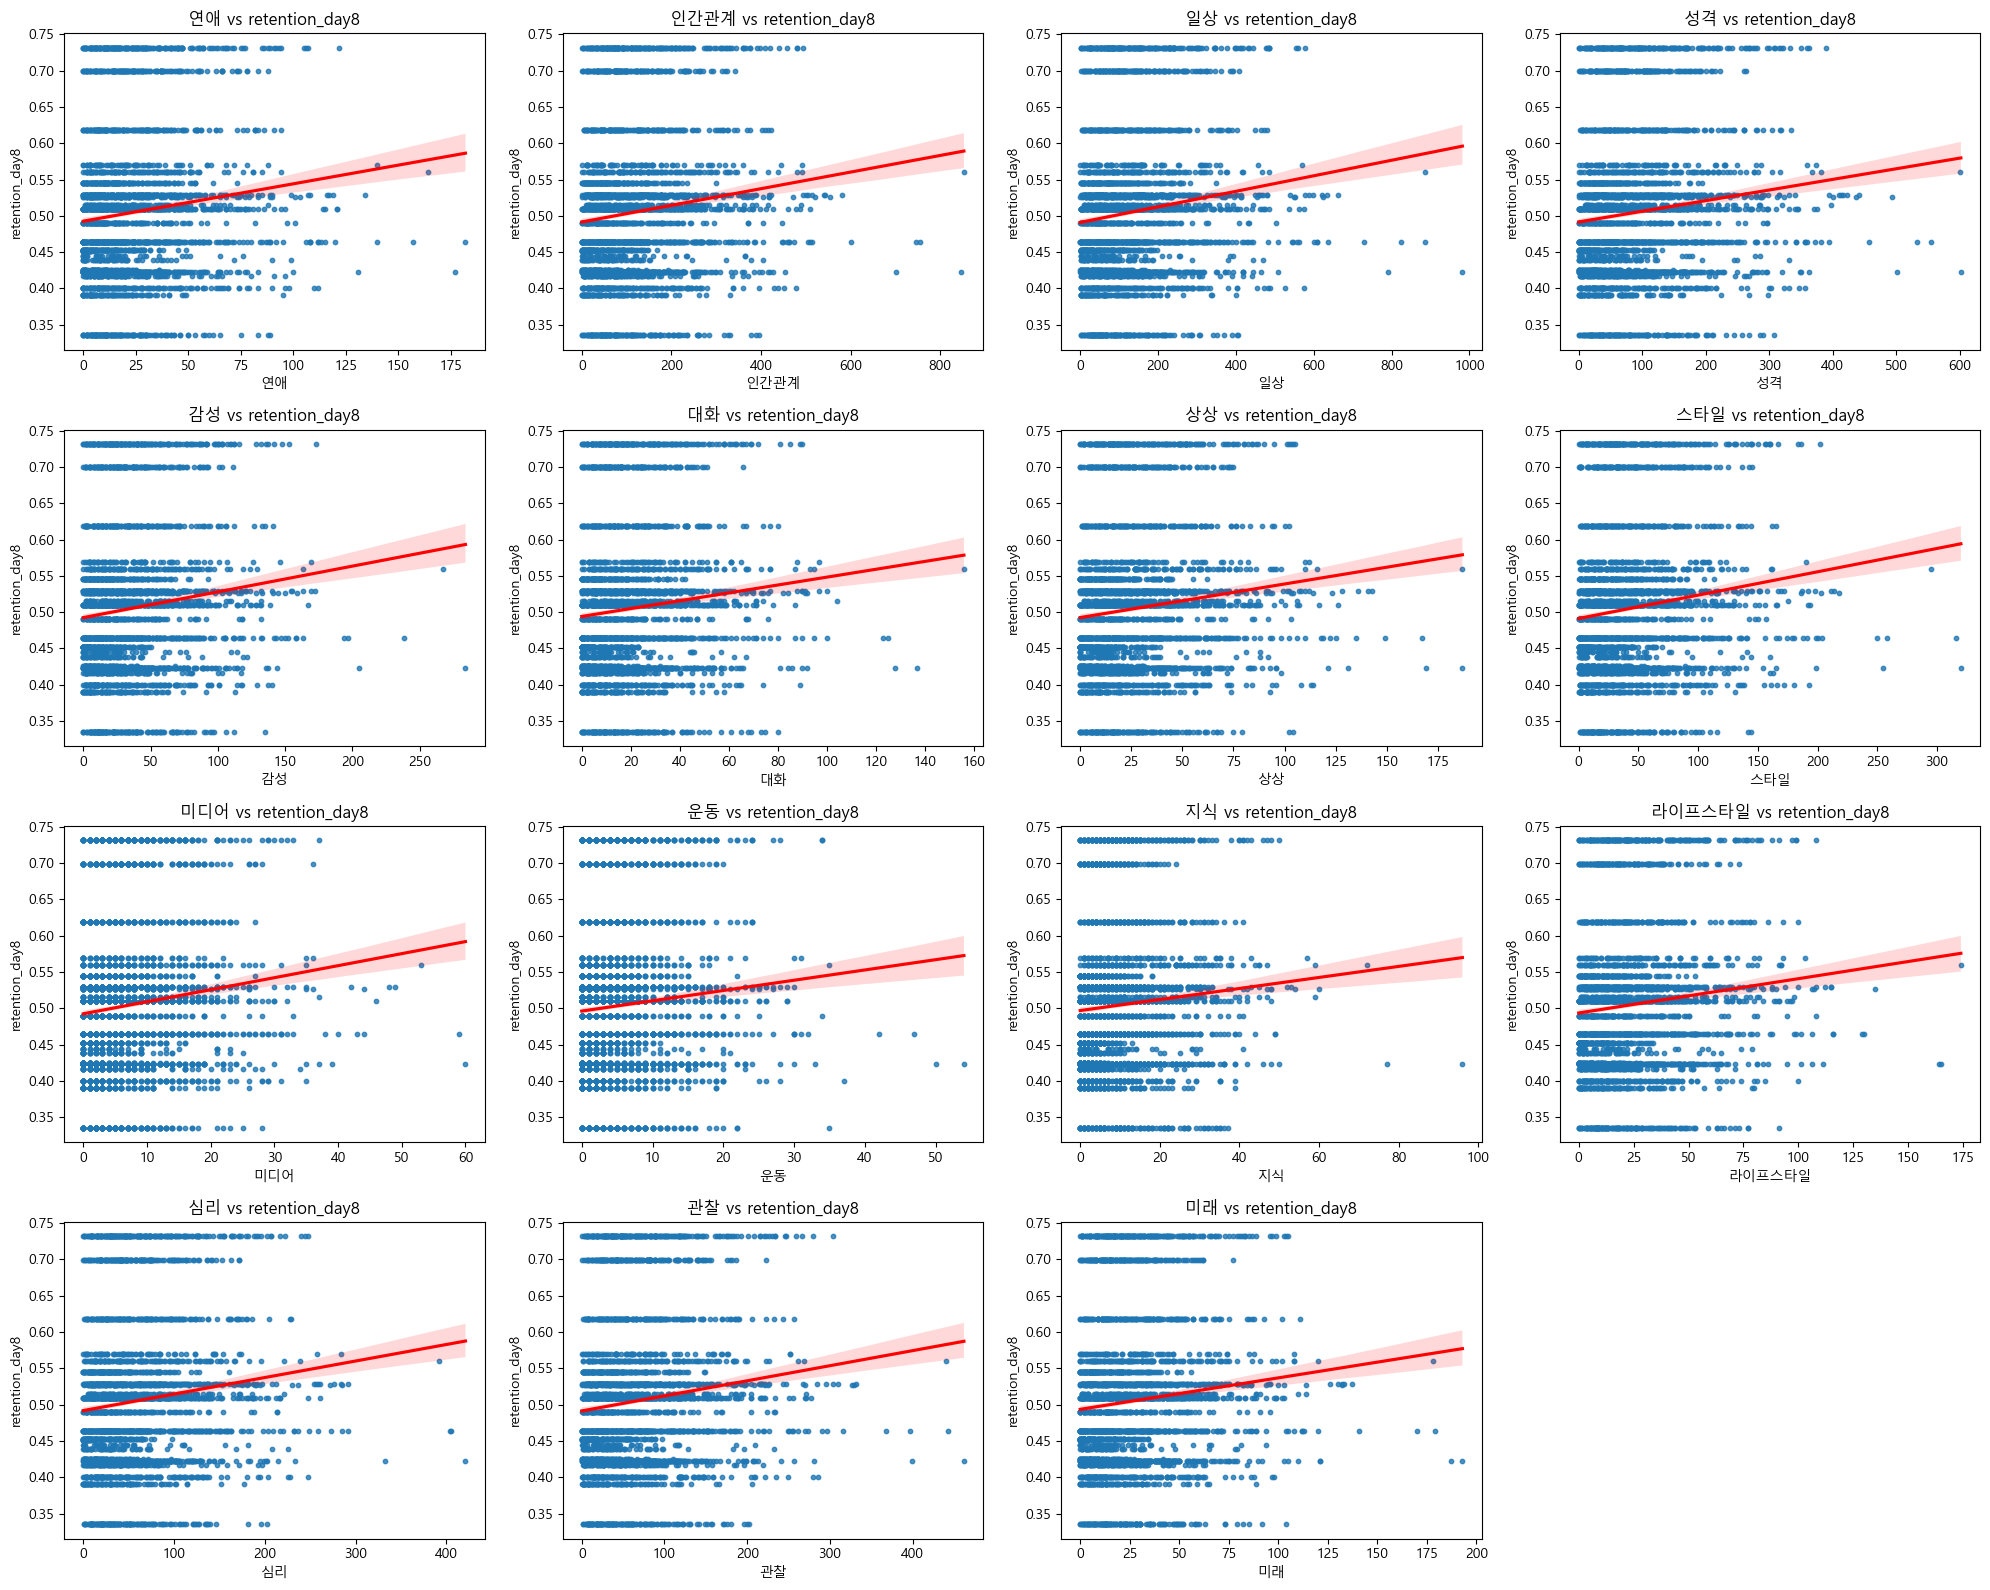

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

# 1) 상관관계 확인
corr = regression_df.drop(labels='user_id', axis=1).corr()['retention_day8'].sort_values()
print(corr)

# 2) 다중회귀 (statsmodels 사용 예시)
X = regression_df.drop(['user_id', 'retention_day8'], axis=1)
y = regression_df['retention_day8']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# 3) 변수별 산점도 + 회귀선 시각화
features = regression_df.columns.drop(['user_id', 'retention_day8'])

num_features = len(features)
cols = 4  # 한 행에 몇 개 subplot을 둘지
rows = (num_features + cols - 1) // cols  # 필요한 행 개수 계산

plt.figure(figsize=(cols*5, rows*4))

for i, col in enumerate(features):
    plt.subplot(rows, cols, i+1)
    sns.regplot(x=regression_df[col], y=regression_df['retention_day8'], scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title(f'{col} vs retention_day8')

plt.tight_layout()
plt.show()

In [82]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 독립변수(X)와 종속변수(y) 분리
X = regression_df.drop(columns=['user_id', 'retention_day8'])
y = regression_df['retention_day8']

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {mse ** 0.5:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.0978
R² Score: -0.0111


## **Classic Retention**

In [ ]:
# 데이터 로딩
userquestionrecord_df = load_data_from_bigquery(
    "SELECT * FROM votes.accounts_userquestionrecord WHERE created_at < '2023-08-01';"
)

Downloading: 100%|██████████|


In [116]:
datetime_cols = userquestionrecord_df.select_dtypes('datetime').columns

for cols in datetime_cols:
    userquestionrecord_df[cols] = userquestionrecord_df[cols].dt.date

In [156]:
# 2. 활동 내역 추출
activity_df = userquestionrecord_df[['user_id', 'created_at']].drop_duplicates()

In [157]:
# 3. 유저별 최초 활동일 → cohort 날짜
user_cohort = activity_df.groupby('user_id')['created_at'].min().reset_index()
user_cohort.rename(columns={'created_at': 'cohort_date'}, inplace=True)

In [158]:
# 4. cohort_date 병합 및 days_diff 계산
activity_df = activity_df.merge(user_cohort, on='user_id')
activity_df['days_diff'] = (activity_df['created_at'] - activity_df['cohort_date']).dt.days

In [159]:
# 5. cohort_date × days_diff 조합으로 유저 수 집계
cohort_data = activity_df.groupby(['cohort_date', 'days_diff'])['user_id'].nunique().reset_index()

In [160]:
# 6. 피벗 테이블로 변환 (row=cohort, col=day offset, value=active user 수)
retention = cohort_data.pivot(index='cohort_date', columns='days_diff', values='user_id').fillna(0)

In [161]:
# 7. Day 0을 기준으로 리텐션 비율 계산
retention_pct = retention.div(retention[0], axis=0)

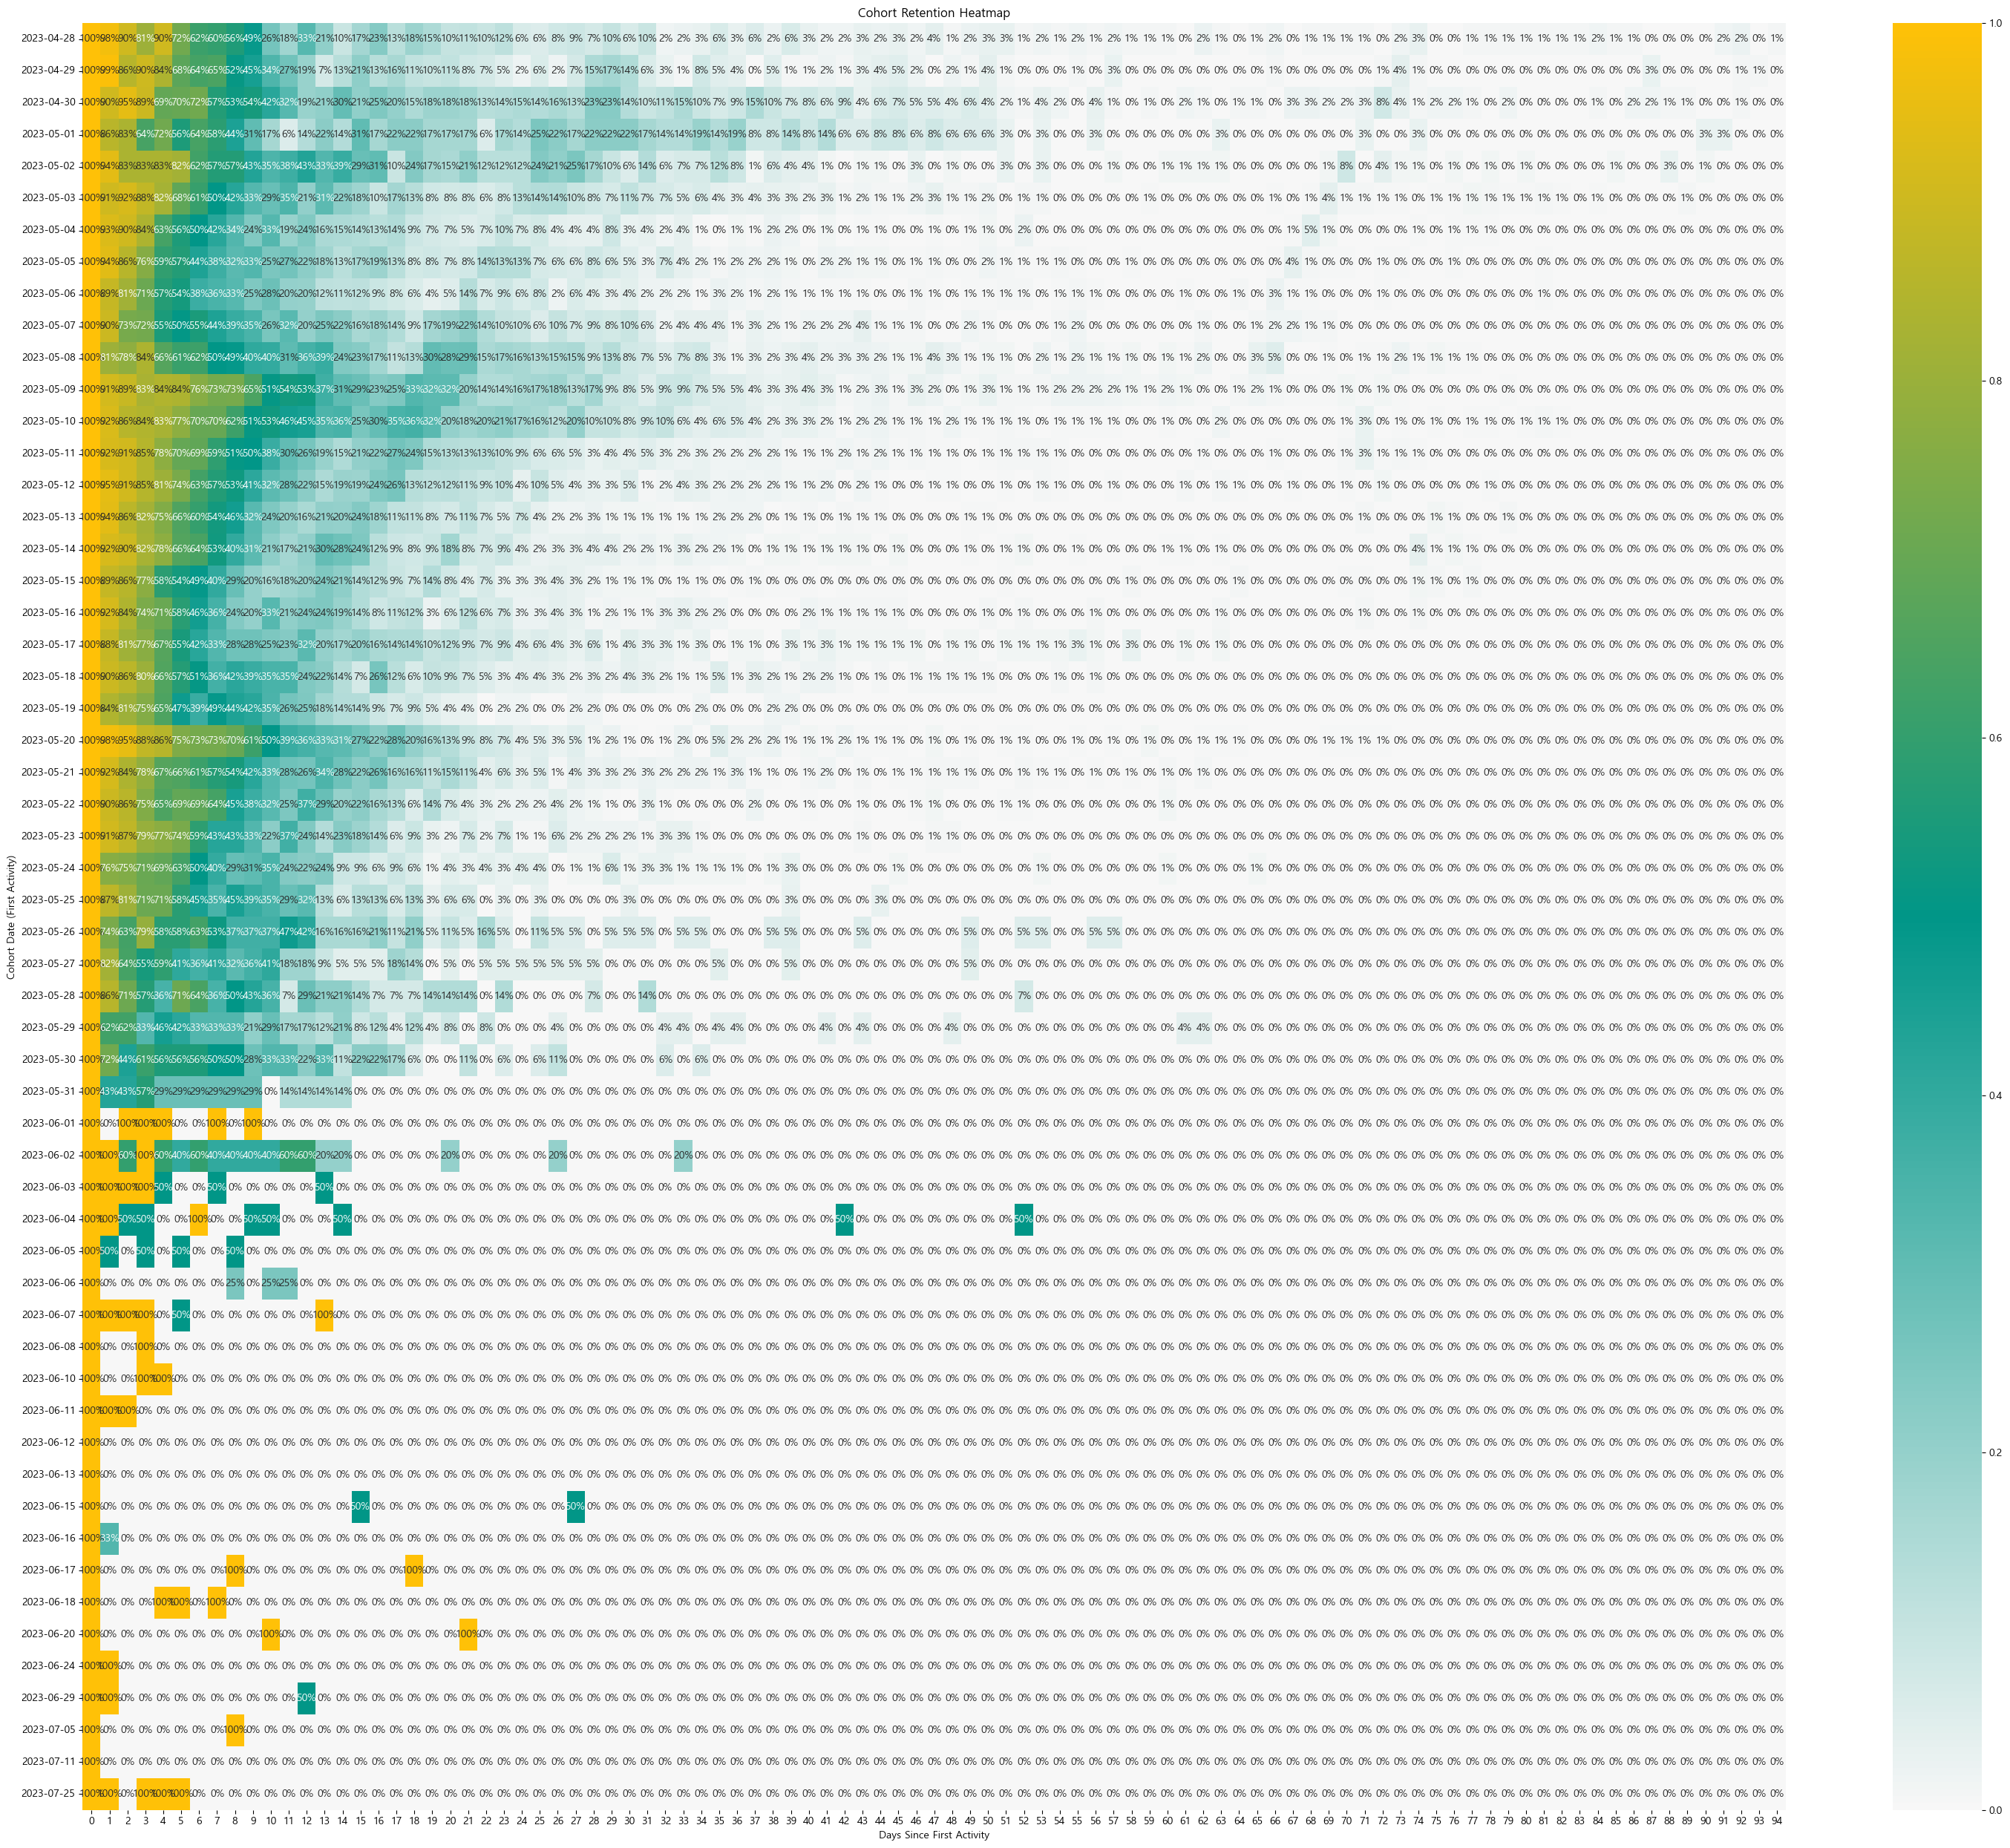

In [163]:
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#f7f7f7', '#009688',  '#ffc107'])

plt.figure(figsize=(30, 25))
sns.heatmap(retention_pct, annot=True, fmt=".0%", cmap=custom_cmap)
plt.title("Cohort Retention Heatmap")
plt.ylabel("Cohort Date (First Activity)")
plt.xlabel("Days Since First Activity")
plt.tight_layout()
plt.show()

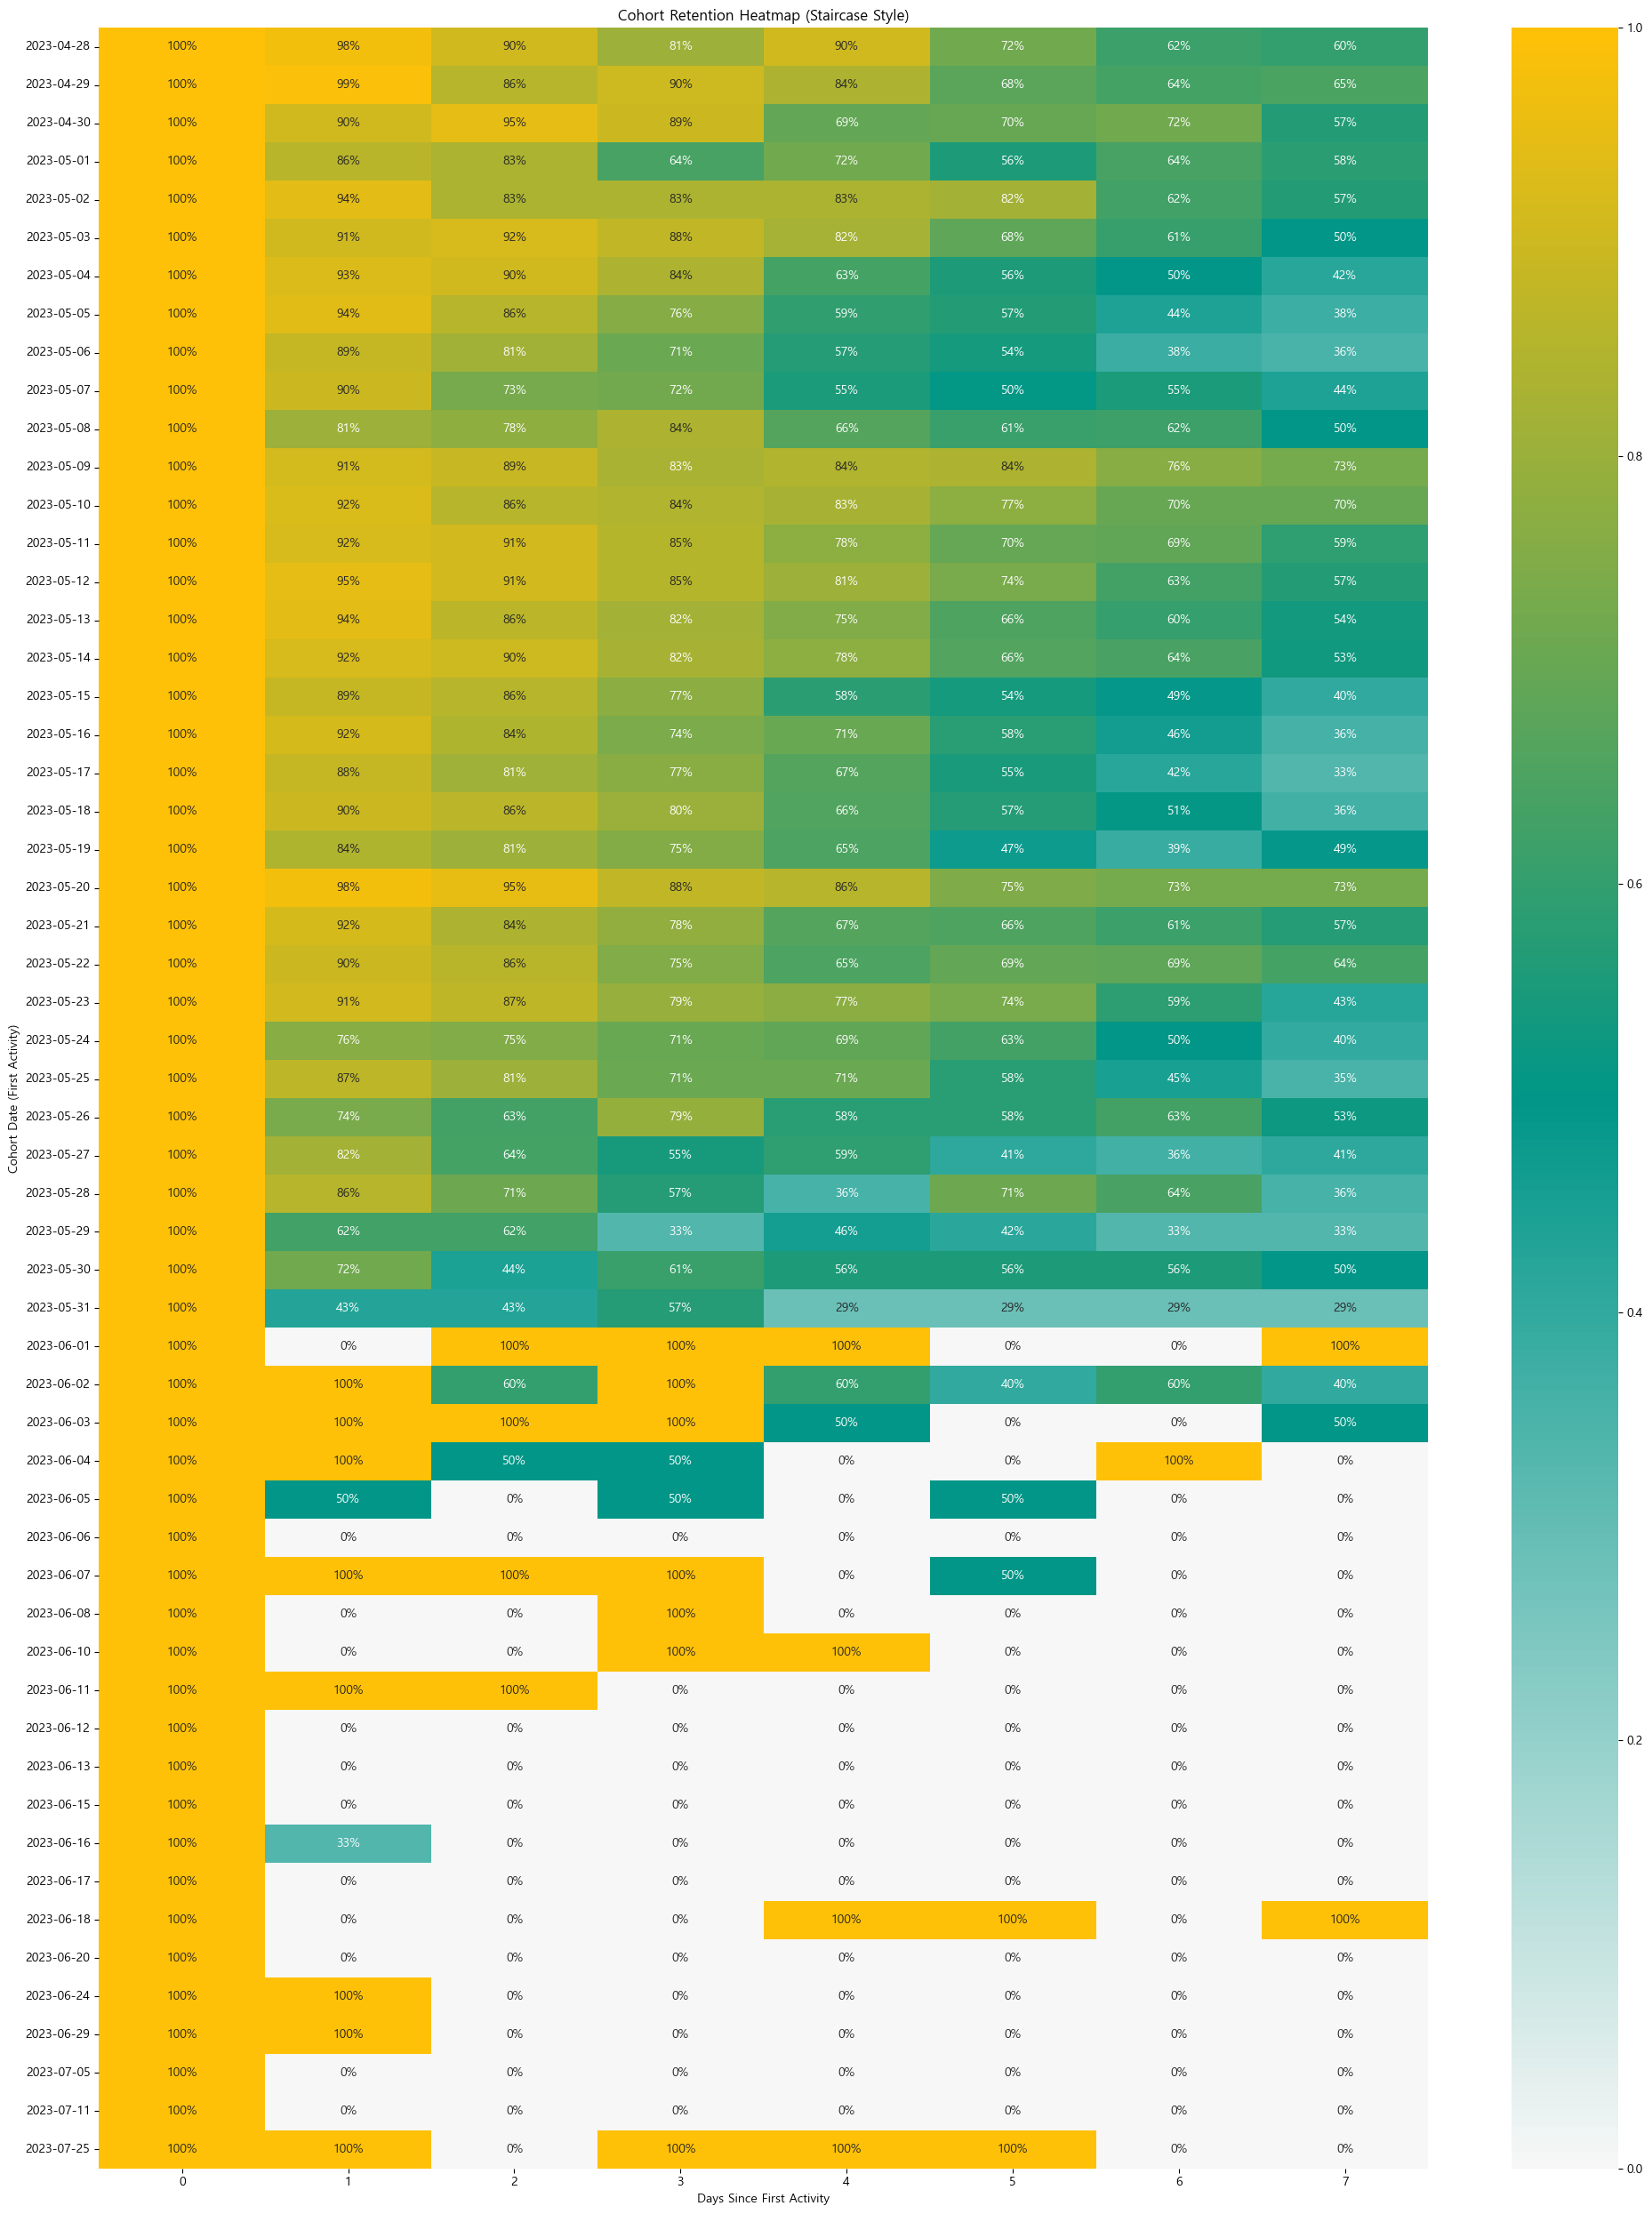

In [ ]:
# 각 cohort가 가지고 있는 마지막 day 계산
last_valid_day_per_cohort = retention_pct.apply(lambda row: row.last_valid_index(), axis=1)

# 마스킹 배열 만들기
mask = pd.DataFrame(False, index=retention_pct.index, columns=retention_pct.columns)
for cohort_date in retention_pct.index:
    last_day = last_valid_day_per_cohort[cohort_date]
    # last_day 이후 날짜는 마스킹 처리
    mask.loc[cohort_date, retention_pct.columns > last_day] = True

custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#f7f7f7', '#009688',  '#ffc107'])

# 시각화
plt.figure(figsize=(20, 25))
sns.heatmap(retention_pct.loc[:, :8], annot=True, fmt=".0%", cmap=custom_cmap, mask=mask, cbar=True)
plt.title("Cohort Retention Heatmap (Staircase Style)")
plt.ylabel("Cohort Date (First Activity)")
plt.xlabel("Days Since First Activity")
plt.tight_layout()
plt.show()

In [146]:
# 1. 필요한 기간 (예: 0~7일차만)
days = list(range(8))
retention = retention.loc[:, days]
retention_pct = retention_pct.loc[:, days]

# 2. 전체 사용자 수 (Day 0)
total_users = retention[0]

# 3. 비율 + 실제 수치 텍스트 병합
styled_data = pd.DataFrame(index=retention_pct.index)

for day in days:
    ratio = retention_pct[day].fillna(0).apply(lambda x: f"{x:.2%}")
    count = retention[day].fillna(0).astype(int).apply(lambda x: f"{x:,}")
    styled_data[f"Day{day}"] = ratio + "\n" + count

# 4. Day 0 사용자 수 별도 열로
styled_data.insert(0, '사용자 수', total_users.apply(lambda x: f"{x:,}"))

# 5. 인덱스를 날짜 포맷으로 가공 (예: 'May 19')
styled_data.index = pd.to_datetime(styled_data.index).strftime('%b %d')

# 6. 결과 출력
print(styled_data)

             사용자 수          Day0         Day1         Day2         Day3  \
cohort_date                                                               
Apr 28       125.0  100.00%\n125  97.60%\n122  90.40%\n113  80.80%\n101   
Apr 29        99.0   100.00%\n99   98.99%\n98   85.86%\n85   89.90%\n89   
Apr 30       114.0  100.00%\n114  90.35%\n103  94.74%\n108  89.47%\n102   
May 01        36.0   100.00%\n36   86.11%\n31   83.33%\n30   63.89%\n23   
May 02        72.0   100.00%\n72   94.44%\n68   83.33%\n60   83.33%\n60   
May 03       383.0  100.00%\n383  90.60%\n347  92.17%\n353  87.73%\n336   
May 04       167.0  100.00%\n167  92.81%\n155  90.42%\n151  83.83%\n140   
May 05       436.0  100.00%\n436  93.81%\n409  85.78%\n374  75.92%\n331   
May 06       183.0  100.00%\n183  88.52%\n162  81.42%\n149  71.04%\n130   
May 07       105.0  100.00%\n105   89.52%\n94   73.33%\n77   72.38%\n76   
May 08       149.0  100.00%\n149  80.54%\n120  77.85%\n116  83.89%\n125   
May 09       231.0  100.0

In [148]:
styled_data

사용자 수          Day0         Day1         Day2         Day3  \
cohort_date                                                               
Apr 28       125.0  100.00%\n125  97.60%\n122  90.40%\n113  80.80%\n101   
Apr 29        99.0   100.00%\n99   98.99%\n98   85.86%\n85   89.90%\n89   
Apr 30       114.0  100.00%\n114  90.35%\n103  94.74%\n108  89.47%\n102   
May 01        36.0   100.00%\n36   86.11%\n31   83.33%\n30   63.89%\n23   
May 02        72.0   100.00%\n72   94.44%\n68   83.33%\n60   83.33%\n60   
May 03       383.0  100.00%\n383  90.60%\n347  92.17%\n353  87.73%\n336   
May 04       167.0  100.00%\n167  92.81%\n155  90.42%\n151  83.83%\n140   
May 05       436.0  100.00%\n436  93.81%\n409  85.78%\n374  75.92%\n331   
May 06       183.0  100.00%\n183  88.52%\n162  81.42%\n149  71.04%\n130   
May 07       105.0  100.00%\n105   89.52%\n94   73.33%\n77   72.38%\n76   
May 08       149.0  100.00%\n149  80.54%\n120  77.85%\n116  83.89%\n125   
May 09       231.0  100.00%\n231  91.34%\n211  88.74%\n205  83.12%\n192   
May 10       173.0  100.00%\n173  92.49%\n160  85.55%\n148  84.39%\n146   
May 11       365.0  100.00%\n365  92.05%\n336  90.96%\n332  85.48%\n312   
May 12       310.0  100.00%\n310  94.84%\n294  90.97%\n282  85.48%\n265   
May 13       377.0  100.00%\n377  94.16%\n355  86.47%\n326  81.70%\n308   
May 14       160.0  100.00%\n160  91.88%\n147  90.00%\n144  82.50%\n132   
May 15       202.0  100.00%\n202  88.61%\n179  85.64%\n173  77.23%\n156   
May 16       119.0  100.00%\n119  91.60%\n109  84.03%\n100   73.95%\n88   
May 17        69.0   100.00%\n69   88.41%\n61   81.16%\n56   76.81%\n53   
May 18        96.0   100.00%\n96   89.58%\n86   86.46%\n83   80.21%\n77   
May 19        57.0   100.00%\n57   84.21%\n48   80.70%\n46   75.44%\n43   
May 20       163.0  100.00%\n163  97.55%\n159  95.09%\n155  87.73%\n143   
May 21       189.0  100.00%\n189  91.53%\n173  83.60%\n158  78.31%\n148   
May 22       137.0  100.00%\n137  89.78%\n123  86.13%\n118  75.18%\n103   
May 23        87.0   100.00%\n87   90.80%\n79   87.36%\n76   79.31%\n69   
May 24        68.0   100.00%\n68   76.47%\n52   75.00%\n51   70.59%\n48   
May 25        31.0   100.00%\n31   87.10%\n27   80.65%\n25   70.97%\n22   
May 26        19.0   100.00%\n19   73.68%\n14   63.16%\n12   78.95%\n15   
May 27        22.0   100.00%\n22   81.82%\n18   63.64%\n14   54.55%\n12   
May 28        14.0   100.00%\n14   85.71%\n12   71.43%\n10    57.14%\n8   
May 29        24.0   100.00%\n24   62.50%\n15   62.50%\n15    33.33%\n8   
May 30        18.0   100.00%\n18   72.22%\n13    44.44%\n8   61.11%\n11   
May 31         7.0    100.00%\n7    42.86%\n3    42.86%\n3    57.14%\n4   
Jun 01         1.0    100.00%\n1     0.00%\n0   100.00%\n1   100.00%\n1   
Jun 02         5.0    100.00%\n5   100.00%\n5    60.00%\n3   100.00%\n5   
Jun 03         2.0    100.00%\n2   100.00%\n2   100.00%\n2   100.00%\n2   
Jun 04         2.0    100.00%\n2   100.00%\n2    50.00%\n1    50.00%\n1   
Jun 05         2.0    100.00%\n2    50.00%\n1     0.00%\n0    50.00%\n1   
Jun 06         4.0    100.00%\n4     0.00%\n0     0.00%\n0     0.00%\n0   
Jun 07         2.0    100.00%\n2   100.00%\n2   100.00%\n2   100.00%\n2   
Jun 08         1.0    100.00%\n1     0.00%\n0     0.00%\n0   100.00%\n1   
Jun 10         1.0    100.00%\n1     0.00%\n0     0.00%\n0   100.00%\n1   
Jun 11         1.0    100.00%\n1   100.00%\n1   100.00%\n1     0.00%\n0   
Jun 12         1.0    100.00%\n1     0.00%\n0     0.00%\n0     0.00%\n0   
Jun 13         1.0    100.00%\n1     0.00%\n0     0.00%\n0     0.00%\n0   
Jun 15         2.0    100.00%\n2     0.00%\n0     0.00%\n0     0.00%\n0   
Jun 16         3.0    100.00%\n3    33.33%\n1     0.00%\n0     0.00%\n0   
Jun 17         1.0    100.00%\n1     0.00%\n0     0.00%\n0     0.00%\n0   
Jun 18         1.0    100.00%\n1     0.00%\n0     0.00%\n0     0.00%\n0   
Jun 20         1.0    100.00%\n1     0.00%\n0     0.00%\n0     0.00%\n0   
Jun 24         1.0    100.00%\n1   100

In [147]:
def color_gradient(val):
    if "%" in val:
        num = float(val.split("%")[0]) / 100
        return f"background-color: rgba(0, 123, 255, {num})"
    return ""

styled_data.style.applymap(color_gradient)

In [ ]:
# 1. 필요한 기간 (예: 0~7일차만)
days = list(range(8))
retention = retention.loc[:, days]
retention_pct = retention_pct.loc[:, days]

# 2. 전체 사용자 수 (Day 0)
total_users = retention[0]

# 3. 비율 + 실제 수치 텍스트 병합
styled_data = pd.DataFrame(index=retention_pct.index)

for day in days:
    ratio = retention_pct[day].fillna(0).apply(lambda x: f"{x:.2%}")
    count = retention[day].fillna(0).astype(int).apply(lambda x: f"{x:,}")
    styled_data[f"Day{day}"] = ratio + "\n" + count

# 4. Day 0 사용자 수 별도 열로
styled_data.insert(0, '사용자 수', total_users.apply(lambda x: f"{x:,}"))

# 5. 인덱스를 날짜 포맷으로 가공 (예: 'May 19')
styled_data.index = pd.to_datetime(styled_data.index).strftime('%b %d')

# 6. 결과 출력
print(styled_data)